# WeGo Brake it Easy CLEANING

## DIRECTIONS: 
1) Make sure this notebook is in the "notebooks" folder within the wego-brake-it-easy root directory, and your CSV is in the "data" folder within that same root. Read_csv path should be "../data/Headway Data, 8-1-2023 to 9-30-2023.csv"
2) Open this notebook and run all cells.

## EXERCISE README

WeGo Public Transit is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

The data for this project can be downloaded from here: <https://drive.google.com/file/d/1iM4WjC9k3EXHPNc6q4AwDh_MEIpXvfMD/view>.

In this project, you'll be analyzing the on-time performance of buses to look for patterns and try to identify correlations to controllable or external factors.

The main variable you will be studying in this project is adherence, which compares the actual departure time to the scheduled time and is included in the ADHERENCE column. A negative adherence value means that a bus left a time point late and a positive adherence indicates that the bus left the time point early. Buses with adherence values beyond negative 6 are generally considered late and beyond positive 1 are considered early. However, there is some additional logic where the staff applies waivers to allow early departures, such as an express bus that has already picked up everyone at a park-and-ride lot and is only dropping people off at the remaining stops, and also allows for early timepoint records for all records where TRIP_EDGE = 2 (end of trip), since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. Note: When determining whether a bus is early or late, it is advised that you use the 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', and 'ADJUSTED_ONTIME_COUNT' columns in order to account for the adjustments.

**Goals of this project:**

1) What is the overall on-time performance, and what do the overall distribution of adherence look like?
2) How does direction of travel, route, or location affect the on-time performance?
3) How does time of day or day of week affect on-time performance?
4) How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.
5) Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

**Stretch Goals:**

6) How much impact does being late or too spaced out at the first stop have downstream?
7) What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?
8) What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?
9) Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal). How do the variables studied related to headway deviation?

## EXERCISE Data Dictionary

A trip is defined as one run of the vehicle from one end of the route to another in one direction. Two trips = one round trip. The TRIP_ID field provides a unique indicator for each trip.

A trip has more stops than are recorded in this data. The stops with data are called Time Points, and these are the points along the route with specific scheduled times that bus operators must adhere to (i.e. they are not allowed to depart early from these stops). There are many intermediate stops in between, but we generally focus on the Time Points as a meaningful subset. All stops can be included, but the datasets become quite large. The values are captured by our vehicle tracking system, which uses a combination of GPS and an onboard computer with login information entered by the driver to match the vehicle to a given scheduled trip, route, and direction.

**Dataset Columns:**  
CALENDAR_ID: Identifier for the date  
SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday).  
ADHERENCE_ID: Unique identifier for each record  
DATE: Trip date  
ROUTE_ABBR: Route identifier. Routes can be found here https://www.wegotransit.com/ride/maps-schedules/bus/. For example, Route 55 is Murfreesboro Pike
BLOCK_ABBR: Indicates the section (block) of the route that the given stop is on  
OPERATOR: Indicates the operator (driver)  
TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDAR_ID.  
OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was added.  
ROUTE_DIRECTION_NAME: Which direction the trip is going; Either to downtown or from downtown  
TIME_POINT_ABBR: Identifies the time point of the record.  
ROUTE_STOP_SEQUENCE: Identifies the stop point.  
TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on a trip (2)  
LATITUDE/LONGITUDE: Location in lat/long  
SCHEDULED_TIME: scheduled time  
ACTUAL_ARRIVAL_TIME: actual arrival time  
ACTUAL_DEPARTURE_TIME: actual departure time  
ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early.  
SCHEDULED_HDWY: Scheduled headway in minutes for the given timepoint crossing record; headway is the difference between the scheduled_time and the previous scheduled time for that stop  
ACTUAL_HDWY: Actual headway; Notably, does not exclude overloads, as we want to know about them for actual headway performance  
HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping)  
ADJUSTED_EARLY_COUNT: 	
ADJUSTED_LATE_COUNT: 	
ADJUSTED_ONTIME_COUNT: 
STOP_CANCELLED:	flags whether a crossing was canceled or waived  
PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is just coming off a detour  
IS_RELIEF: flags whether a particular crossing is a relief - i.e. the first timepoint crossing of a new driver on the bus/block	  
BLOCK_STOP_ORDER:   
DWELL_IN_MINS: Actual Departure Time - Actual Arrival Time (in minutes)
SCHEDULED_LAYOVER_MINUTES: Applies only for TRIP_EDGE 1 (the beginning of a trip). Tells how much time between the scheduled time at the end of the previous trip and the current trip. 

## EXERCISE WeGo Data Introduction

In [1]:
import pandas as pd, numpy as np
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [2]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [3]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [4]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [5]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [6]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [7]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [9]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [10]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


## Step 0) Setup and Parsing

In [17]:
# =========================
# 0) Setup & Parsing (Idempotent, safe to re-run)
# =========================
# (comments unchanged above…)

import pandas as pd, numpy as np
from pathlib import Path
pd.options.mode.copy_on_write = True

in_path = "../data/Headway Data, 8-1-2023 to 9-30-2023.csv"
out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)

wego = pd.read_csv(in_path, dtype=str, na_values=["", "NA", "NaN", "null", None])

_num = lambda s: pd.to_numeric(s, errors="coerce")
if "SERVICE_ABBR" in wego.columns:
    wego["SERVICE_ABBR"] = _num(wego["SERVICE_ABBR"]).astype("Int64")
if "ROUTE_ABBR" in wego.columns:
    wego["ROUTE_ABBR"] = _num(wego["ROUTE_ABBR"]).astype("Int64")
if "STOP_CANCELLED" in wego.columns:
    wego["STOP_CANCELLED"] = _num(wego["STOP_CANCELLED"]).fillna(0).astype(int)
if "TRIP_ID" in wego.columns:
    wego["TRIP_ID"] = _num(wego["TRIP_ID"]).astype("Int64")
if "CALENDAR_ID" in wego.columns:
    wego["CALENDAR_ID"] = _num(wego["CALENDAR_ID"]).astype("Int64")

wego = wego.copy()

for c in ["DATE","SCHEDULED_TIME","ACTUAL_ARRIVAL_TIME","ACTUAL_DEPARTURE_TIME"]:
    if c in wego.columns:
        wego[c] = pd.to_datetime(wego[c], errors="coerce")

cal = wego.get("CALENDAR_ID")
tid = wego.get("TRIP_ID")
wego["trip_key"] = (
    (cal.astype("string") if cal is not None else pd.Series(index=wego.index, dtype="string")).fillna("UNK")
    + "_"
    + (tid.astype("string") if tid is not None else pd.Series(index=wego.index, dtype="string")).fillna("UNK")
)

PEAK_AM = (7, 9)
PEAK_PM = (16, 18)

if "DATE" in wego.columns:
    wego["dow"]  = wego["DATE"].dt.day_name()
if "SCHEDULED_TIME" in wego.columns:
    wego["hour"] = wego["SCHEDULED_TIME"].dt.hour
    wego["peak"] = np.where(
        wego["hour"].between(*PEAK_AM) | wego["hour"].between(*PEAK_PM),
        "Peak", "Off-peak"
    )

service_map = {1:"Weekday", 2:"Saturday", 3:"Sunday"}
wego["service_type"] = (
    wego["SERVICE_ABBR"].map(service_map).fillna("Other")
    if "SERVICE_ABBR" in wego.columns else "Other"
)

for c in ["ROUTE_DIRECTION_NAME","dow","service_type","peak"]:
    if c in wego.columns:
        wego[c] = wego[c].astype("category")

route_names = {
    3:'West End', 7:'Hillsboro', 22:'Bordeaux', 23:'Dickerson Pike',
    50:'Charlotte Pike', 52:'Nolensville Pike', 55:'Murfreesboro Pike', 56:'Gallatin Pike'
}
if "ROUTE_ABBR" in wego.columns:
    wego["route_name"] = wego["ROUTE_ABBR"].map(route_names).astype("string").fillna(wego["ROUTE_ABBR"].astype("string"))

timepoint_seeds = {}

if "timepoint_name" not in wego.columns:
    wego["timepoint_name"] = pd.NA
if "TIME_POINT_ABBR" in wego.columns:
    wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"].astype(str).map(timepoint_seeds))

def _gtfs_stops_or_none(url="https://www.wegotransit.com/GoogleExport/google_transit.zip"):
    try:
        import io, zipfile, requests
        r = requests.get(url, timeout=60)
        r.raise_for_status()
        zf = zipfile.ZipFile(io.BytesIO(r.content))
        stops = pd.read_csv(zf.open("stops.txt"))
        return stops[["stop_id","stop_code","stop_name","stop_lat","stop_lon"]].copy()
    except Exception:
        return None

stops = _gtfs_stops_or_none()
if stops is not None and "TIME_POINT_ABBR" in wego.columns:
    wego["TIME_POINT_ABBR_str"] = wego["TIME_POINT_ABBR"].astype(str)
    stops["stop_code_str"] = stops["stop_code"].astype(str)
    w1 = wego.merge(
        stops[["stop_code_str","stop_name"]],
        left_on="TIME_POINT_ABBR_str", right_on="stop_code_str", how="left"
    )
    wego["timepoint_name"] = wego["timepoint_name"].fillna(w1["stop_name"])
    need_nn = (
        wego["timepoint_name"].isna()
        & wego.get("LATITUDE", pd.Series(index=wego.index)).notna()
        & wego.get("LONGITUDE", pd.Series(index=wego.index)).notna()
    )
    if need_nn.any():
        try:
            from scipy.spatial import cKDTree
            LAT_M = 111_132.0
            LON_M = 111_132.0 * np.cos(np.deg2rad(36.1627))
            stops_xy = np.c_[stops["stop_lat"]*LAT_M, stops["stop_lon"]*LON_M]
            tree = cKDTree(stops_xy)
            wego_nn = wego.loc[need_nn, ["TIME_POINT_ABBR","LATITUDE","LONGITUDE"]].dropna()
            wego_xy = np.c_[wego_nn["LATITUDE"].astype(float)*LAT_M, wego_nn["LONGITUDE"].astype(float)*LON_M]
            dist, idx = tree.query(wego_xy, k=1)
            nn = wego_nn.assign(
                nearest_stop_name = stops.iloc[idx]["stop_name"].values,
                nn_dist_m = dist
            )
            nn_good = nn.loc[nn["nn_dist_m"] <= 100, ["TIME_POINT_ABBR","nearest_stop_name"]]
            tp_lookup = (
                nn_good.groupby("TIME_POINT_ABBR")["nearest_stop_name"]
                       .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else s.iloc[0])
            )
            fill_mask = wego["timepoint_name"].isna()
            wego.loc[fill_mask, "timepoint_name"] = wego.loc[fill_mask, "TIME_POINT_ABBR"].map(tp_lookup)
        except Exception:
            if {"LATITUDE","LONGITUDE"}.issubset(wego.columns):
                wego["lat_r"] = wego["LATITUDE"].astype(float).round(4)
                wego["lon_r"] = wego["LONGITUDE"].astype(float).round(4)
                stops["lat_r"] = stops["stop_lat"].round(4)
                stops["lon_r"] = stops["stop_lon"].round(4)
                w2 = wego.merge(stops[["lat_r","lon_r","stop_name"]], on=["lat_r","lon_r"], how="left")
                fill_mask = wego["timepoint_name"].isna()
                wego.loc[fill_mask, "timepoint_name"] = w2.loc[fill_mask, "stop_name"]

if "TIME_POINT_ABBR" in wego.columns:
    wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"])

# 0.5 Headway features, OTP-ready filtering, policy flags & labels
# ----------------------------------------------------------------
# Headway features — guard against SCHEDULED_HDWY <= 0
hdwy_dev_raw   = pd.to_numeric(wego.get("HDWY_DEV"), errors="coerce")
sched_hdwy_raw = pd.to_numeric(wego.get("SCHEDULED_HDWY"), errors="coerce")

# Valid only when scheduled headway is strictly positive
wego["hdwy_valid"] = sched_hdwy_raw.gt(0)

# >>> FIX: sanitize SCHEDULED_HDWY/HDWY_DEV so DF_FULL contains no non-positive values <<<
# (a) keep a count of non-positive values for the DQ print
nonpos_sched_hdwy_count = int((sched_hdwy_raw <= 0).fillna(False).sum())
# (b) coerce invalid scheduled headways to NaN in the canonical columns
wego["SCHEDULED_HDWY"] = np.where(wego["hdwy_valid"], sched_hdwy_raw, np.nan)
# (c) also null-out HDWY_DEV where scheduled headway is invalid (avoids accidental use)
wego["HDWY_DEV"] = np.where(wego["hdwy_valid"], hdwy_dev_raw, np.nan)

# Compute % deviation only for valid rows; otherwise NaN
wego["hdwy_pct_dev"] = wego["HDWY_DEV"] / wego["SCHEDULED_HDWY"]

# Visual-only helper (never use for metrics)
wego["hdwy_pct_dev_clip"] = wego["hdwy_pct_dev"].clip(0, 3)

# OTP-ready subset (keep a “full” copy separately)
wego_all = wego
mask_keep = (
    wego_all.get("SCHEDULED_TIME", pd.Series(index=wego_all.index)).notna()
    & wego_all.get("ACTUAL_DEPARTURE_TIME", pd.Series(index=wego_all.index)).notna()
    & (wego_all.get("STOP_CANCELLED", pd.Series(index=wego_all.index, dtype=int)).fillna(0) != 1)
)
wego_otp = wego_all.loc[mask_keep].copy()

for col, src in [("is_early","ADJUSTED_EARLY_COUNT"),
                 ("is_late","ADJUSTED_LATE_COUNT"),
                 ("is_ontime","ADJUSTED_ONTIME_COUNT")]:
    if src in wego_otp.columns:
        wego_otp[col] = (_num(wego_otp[src]).fillna(0) > 0).astype(int)
    else:
        wego_otp[col] = 0

if "TRIP_EDGE" in wego_otp.columns:
    at_end = (_num(wego_otp["TRIP_EDGE"]) == 2)
    to_convert = (at_end) & (wego_otp["is_early"] == 1) & (wego_otp["is_late"] == 0)
    if to_convert.any():
        print(f"End-of-trip early→on-time conversions: {int(to_convert.sum()):,}")
    wego_otp.loc[to_convert, ["is_early","is_ontime"]] = (0, 1)

conflict = (wego_otp["is_early"] + wego_otp["is_late"]) > 1
if conflict.any():
    print(f"Warning: {int(conflict.sum()):,} rows flagged both Early and Late; keeping Late precedence in labels.")

wego_otp["otp_label"] = np.select(
    [wego_otp["is_ontime"].eq(1), wego_otp["is_late"].eq(1), wego_otp["is_early"].eq(1)],
    ["On-time","Late","Early"], default="Unclassified"
)

if "ADHERENCE" in wego_otp.columns:
    wego_otp["ADHERENCE"] = _num(wego_otp["ADHERENCE"])
    wego_otp["ADHERENCE_clip"] = wego_otp["ADHERENCE"].clip(-30, 15)

for col, fb in [("route_name","ROUTE_ABBR"), ("timepoint_name","TIME_POINT_ABBR")]:
    if col in wego_otp.columns and fb in wego_otp.columns:
        wego_otp[col] = wego_otp[col].fillna(wego_otp[fb].astype(str))

# Data-quality report (now includes the non-positive headway count)
dq = {
    "rows_total": len(wego_all),
    "rows_otp_kept": len(wego_otp),
    "pct_kept": f"{len(wego_otp)/max(1,len(wego_all)):.1%}",
    "missing_sched": int(wego_all.get("SCHEDULED_TIME", pd.Series()).isna().sum()),
    "missing_act_dep": int(wego_all.get("ACTUAL_DEPARTURE_TIME", pd.Series()).isna().sum()),
    "cancelled": int((wego_all.get("STOP_CANCELLED", pd.Series(dtype=int)).fillna(0)==1).sum()),
    "nonpos_sched_hdwy": nonpos_sched_hdwy_count,  # <<< added
}
print("Data Quality:", dq)

# 0.6 Exports … (unchanged below)
# ----------------------------------------------------------------
# A) By Route
if {"ROUTE_ABBR","is_ontime"}.issubset(wego_otp.columns):
    wego_by_route = (
        wego_otp.groupby("ROUTE_ABBR", as_index=False)
                .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
    )
    rn_map = wego_otp.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
    wego_by_route["route_name"] = rn_map.reindex(wego_by_route["ROUTE_ABBR"]).values
    wego_by_route = wego_by_route.sort_values(["otp","n"], ascending=[False, False])
    wego_by_route.to_csv(out_dir / "wego_by_route.csv", index=False, encoding="utf-8-sig")
else:
    wego_by_route = pd.DataFrame(columns=["ROUTE_ABBR","otp","n","route_name"])

# B) Trip Summary
if "trip_key" in wego_otp.columns:
    trip_summary = (
        wego_otp.groupby("trip_key", observed=True)
        .agg(
            ROUTE_ABBR=("ROUTE_ABBR","first"),
            route_dir=("ROUTE_DIRECTION_NAME","first"),
            service=("service_type","first"),
            start_time=("SCHEDULED_TIME","min"),
            end_time=("SCHEDULED_TIME","max"),
            n_tp=("is_ontime","size"),
            otp_rate=("is_ontime","mean"),
            mean_adh=("ADHERENCE","mean"),
            std_adh=("ADHERENCE","std"),
            hdwy_std=("hdwy_pct_dev","std"),
        )
        .reset_index()
    )
    if "OVERLOAD_ID" in wego_otp.columns:
        overload_map = (
            wego_otp.assign(_ov=_num(wego_otp["OVERLOAD_ID"]).fillna(0).ne(0))
                    .groupby("trip_key")["_ov"].any()
        )
        trip_summary["overload_seen"] = trip_summary["trip_key"].map(overload_map).fillna(False)
    else:
        trip_summary["overload_seen"] = False

    trip_summary["route_name"] = trip_summary["ROUTE_ABBR"].map(route_names)\
                                        .fillna(trip_summary["ROUTE_ABBR"].astype(str))
    trip_summary.to_csv(out_dir / "wego_trip_summary.csv", index=False, encoding="utf-8-sig")
else:
    trip_summary = pd.DataFrame(columns=[
        "trip_key","ROUTE_ABBR","route_dir","service","start_time","end_time",
        "n_tp","otp_rate","mean_adh","std_adh","hdwy_std","overload_seen","route_name"
    ])

# C) Timepoint Hotspots
_needed = {"ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","is_late","is_early","is_ontime"}
if _needed.issubset(wego_otp.columns):
    keys = ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]
    dfg = wego_otp.loc[:, keys + ["is_late","is_early","is_ontime","route_name","timepoint_name"]].copy()
    dfg["ROUTE_ABBR"] = _num(dfg["ROUTE_ABBR"]).astype("Int64")
    dfg["ROUTE_DIRECTION_NAME"] = dfg["ROUTE_DIRECTION_NAME"].astype(str)
    dfg["TIME_POINT_ABBR"] = dfg["TIME_POINT_ABBR"].astype(str)

    tp_perf = (
        dfg.groupby(keys, as_index=False, observed=True)
           .agg(late_rate=("is_late","mean"),
                early_rate=("is_early","mean"),
                otp_rate=("is_ontime","mean"),
                n=("is_ontime","size"))
    )
    tp_perf["route_name"] = tp_perf["ROUTE_ABBR"].map(route_names).fillna(tp_perf["ROUTE_ABBR"].astype(str))
    tp_name_map = (
        wego_otp.loc[:, ["TIME_POINT_ABBR","timepoint_name"]]
                .dropna(subset=["timepoint_name"])
                .drop_duplicates(subset=["TIME_POINT_ABBR"])
                .set_index("TIME_POINT_ABBR")["timepoint_name"]
    )
    tp_perf["timepoint_name"] = tp_perf["TIME_POINT_ABBR"].map(tp_name_map).fillna(tp_perf["TIME_POINT_ABBR"])
    tp_perf = tp_perf.sort_values(["late_rate","n"], ascending=[False, False])
    tp_perf.to_csv(out_dir / "wego_timepoint_hotspots.csv", index=False, encoding="utf-8-sig")
else:
    tp_perf = pd.DataFrame(columns=[
        "ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","late_rate","early_rate","otp_rate","n","route_name","timepoint_name"
    ])

# D) Enriched dumps
wego_all.to_csv(out_dir / "wego_enriched_full.csv", index=False, encoding="utf-8-sig")
wego_otp.to_csv(out_dir / "wego_otp_enriched_full.csv", index=False, encoding="utf-8-sig")

print("Exports complete → ../data/:")
print(" - wego_by_route.csv")
print(" - wego_trip_summary.csv")
print(" - wego_timepoint_hotspots.csv")
print(" - wego_enriched_full.csv")
print(" - wego_otp_enriched_full.csv")

# 0.7) In-memory DataFrames
df_full_enriched = wego_all.copy()
df_otp_enriched  = wego_otp.copy()
df_by_route      = wego_by_route.copy()
df_trip_summary  = trip_summary.copy()
df_timepoint_hotspots = tp_perf.copy()

# 0.8) Canonical Aliases
DF_FULL  = df_full_enriched
DF_OTP   = df_otp_enriched
BY_ROUTE = df_by_route
TRIPS    = df_trip_summary
TP_HOT   = df_timepoint_hotspots

print(
    "Aliases ready:\n"
    f" - DF_FULL:  {DF_FULL.shape}\n"
    f" - DF_OTP:   {DF_OTP.shape}\n"
    f" - BY_ROUTE: {BY_ROUTE.shape}\n"
    f" - TRIPS:    {TRIPS.shape}\n"
    f" - TP_HOT:   {TP_HOT.shape}"
)


C:\Users\micha\AppData\Local\Temp\ipykernel_25048\3787429629.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wego["timepoint_name"] = wego["timepoint_name"].fillna(wego["TIME_POINT_ABBR"].astype(str).map(timepoint_seeds))


End-of-trip early→on-time conversions: 742
Data Quality: {'rows_total': 350329, 'rows_otp_kept': 335993, 'pct_kept': '95.9%', 'missing_sched': 0, 'missing_act_dep': 11468, 'cancelled': 5347, 'nonpos_sched_hdwy': 108}
Exports complete → ../data/:
 - wego_by_route.csv
 - wego_trip_summary.csv
 - wego_timepoint_hotspots.csv
 - wego_enriched_full.csv
 - wego_otp_enriched_full.csv
Aliases ready:
 - DF_FULL:  (350329, 41)
 - DF_OTP:   (335993, 46)
 - BY_ROUTE: (8, 4)
 - TRIPS:    (66244, 13)
 - TP_HOT:   (120, 9)


## README of Step 0 (explanation of new columns and tables created)

### Engineered Columns & Exported Tables Overview

#### Core Keys & Labels

**`trip_key` (string)**  
**What:** Unique trip instance identifier per service day.  
**How:** `f"{CALENDAR_ID}_{TRIP_ID}"` — guards against `TRIP_ID` reuse across days.  
**Why:** Enables trip-level analysis (first stop impact, layover effects, variability).  
**Supports:** Q6–Q8.

**`route_name` (string)**  
**What:** Human-readable name for `ROUTE_ABBR`.  
**How:** Map via `route_names` dict; fallback to `ROUTE_ABBR` as string.  
**Why:** Improves stakeholder readability in tables/maps.  
**Supports:** Q1–Q3, Q5, Q9.

**`timepoint_name` (string)**  
**What:** Human-readable name for `TIME_POINT_ABBR`.  
**How (tiered):**
1. Seed dictionary (manual fixes)  
2. GTFS `stops.txt` join on `stop_code`  
3. Nearest-neighbor match (≤100 m) from `LAT/LON` to GTFS stops  
4. Rounded coordinate join fallback  
5. Final fallback = `TIME_POINT_ABBR`  
**Why:** Clearer hotspot labels & map tooltips.  
**Supports:** Q2, Q6–Q9.

---

#### Time & Service Features

- **`dow` (string)** – Weekday name from `DATE`. *(Q3)*  
- **`hour` (int)** – 0–23 from `SCHEDULED_TIME`. *(Q3)*  
- **`peak` (string)** – “Peak” if hour in [7–9] or [16–18]; else “Off-peak”. *(Q3)*  
- **`service_type` (string)** – “Weekday”, “Saturday”, “Sunday”, or “Other”, mapped from `SERVICE_ABBR` (e.g., Labor Day 9/4/2023 is “Sunday” service in this dataset). *(Q3)*

---

#### Headway Metrics

**`hdwy_valid` (bool)**  
**What:** Validity flag for headway math.  
**How:** `SCHEDULED_HDWY > 0`.  
**Why:** Prevents divide-by-zero and nonsense ratios; drives clean headway analytics.  
**Supports:** Q5, Q9.

**`SCHEDULED_HDWY` / `HDWY_DEV` (sanitized)**  
**What:** Source columns with invalid rows nulled.  
**How:** If `hdwy_valid == False`, set both **`SCHEDULED_HDWY`** and **`HDWY_DEV`** to `NaN`.  
**Why:** Keeps **DF_FULL**/exports tidy and avoids downstream misuse.  
**Supports:** Q5, Q9.

**`hdwy_pct_dev` (float, unitless ratio)**  
**What:** Actual vs scheduled headway ratio deviation.  
**How:** `HDWY_DEV / SCHEDULED_HDWY` where `hdwy_valid == True`; else `NaN`.  
**Interpretation:**  
- 1.0 = on target  
- <1 = bunching &nbsp;|&nbsp; >1 = gapping  
- 0.5–1.5 = generally acceptable band (±50%)  
**Supports:** Q5, Q9.

**`hdwy_pct_dev_clip` (float)** – `hdwy_pct_dev` clipped to [0, 3] for chart readability. *(Q5, Q9)*

> **Note:** Use `hdwy_valid` (or naturally drop `NaN`s) when aggregating headway metrics.

---

#### OTP Policy Features (Adjusted)

**`is_early` / `is_late` / `is_ontime` (int: 0/1)**  
**What:** Policy-adjusted classification per row.  
**How:** Booleans derived from `ADJUSTED_*_COUNT`; then apply the waiver: **if `TRIP_EDGE == 2` and not Late, convert Early → On-time**.  
**Why:** Honors WeGo waiver logic (early at end of trip is allowed; late at end still counts late).  
**Supports:** Q1–Q5, Q6.

**`otp_label` (string)** – “On-time”, “Late”, “Early”, “Unclassified”; convenience label from the flags above. *(Q1–Q4)*

---

#### Visualization Helpers

**`ADHERENCE_clip` (float, minutes)** – `ADHERENCE` clipped to [-30, +15] for charts. *(Q1, Q6, Q8)*

*Note:* Temporary columns like `TIME_POINT_ABBR_str`, `lat_r`, and `lon_r` are used only for matching; they are not exported unless explicitly retained.

---

### Exported Tables Summary

#### 1. `wego_enriched_full.csv`
**Audience:** Analysts / QA (complete context)  
**Rows:** All records after type normalization & enrichment (no OTP filtering)  
**Columns:** Original + engineered (`trip_key`, `route_name`, etc.)  
**Filters Applied:** None  
**Sanitization:** Non-positive `SCHEDULED_HDWY` → `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; **`hdwy_valid`** indicates rows suitable for headway analysis.  
**Why:** Enables audit, enrichment checks, and edge case investigation.  
**Caveats:** Includes cancelled/invalid rows; not for KPI baselines.

---

#### 2. `wego_otp_enriched_full.csv`
**Audience:** Analysts / stakeholders (policy-aligned facts)  
**Rows:** OTP-ready subset honoring WeGo policy  
**Columns:** Adds `is_early`, `is_late`, `is_ontime`, `otp_label`  
**Filters Applied:**
- Drop missing `SCHEDULED_TIME` or `ACTUAL_DEPARTURE_TIME`  
- Drop `STOP_CANCELLED == 1`  
- Apply waiver: **`TRIP_EDGE == 2` & not Late → Early becomes On-time**  
**Sanitization:** Headway fields mirror DF_FULL sanitization; use `hdwy_valid` for Q5/Q9.  
**Why:** Reflects true operated service; official KPI base.  
**Caveats:** Headway analysis still requires contextual filtering.

---

#### 3. `wego_by_route.csv`
**Audience:** Managers / execs (high-level KPI by route)  
**Rows:** One per `ROUTE_ABBR`  
**Columns:** `ROUTE_ABBR`, `otp`, `n`, `route_name`  
**Source:** `wego_otp` subset  
**Why:** Ranked view of route reliability (Q1–Q3, Q5, Q9)  
**Caveats:** Combines directions; analyze separately if needed.

---

#### 4. `wego_trip_summary.csv`
**Audience:** Operations / planning (trip dynamics)  
**Rows:** One per `trip_key` (unique per service day)  
**Columns:**  
- Keys: `trip_key`, `ROUTE_ABBR`, `route_name`, `route_dir`, `service`  
- Timing: `start_time`, `end_time`  
- Counts: `n_tp`  
- OTP: `otp_rate`  
- Adherence: `mean_adh`, `std_adh`  
- Headway: `hdwy_std` *(computed from sanitized headway fields)*  
- Exceptions: `overload_seen`  
**Why:** Enables Q6–Q8 trip-level analysis.  
**Caveats:** Short trips may lack multiple headways.

---

#### 5. `wego_timepoint_hotspots.csv`
**Audience:** Field ops / planners (where to act)  
**Rows:** Timepoint rollups per route/direction  
**Columns:** `ROUTE_ABBR`, `route_name`, `ROUTE_DIRECTION_NAME`, `TIME_POINT_ABBR`, `timepoint_name`, `late_rate`, `early_rate`, `otp_rate`, `n`  
**Source:** `wego_otp`  
**Why:** Identify stops contributing most to lateness/earliness (Q2, Q6–Q9)  
**Caveats:** Filter small `n` (e.g., <200) for stability.

---

#### Optional “Clean Headway” Lens
(Not exported by default)  
Used in Q9 for spacing reliability.  
Start from `DF_OTP`, filter `hdwy_valid == True` (and optionally `PREV_SCHED_STOP_CANCELLED != 1`), then summarize median/mean absolute headway % deviation.

---

#### Why These Filters & Sanitization Matter

| Filter / Sanitization | Reason |
|-----------------------|--------|
| Missing times | Can’t compute OTP or adherence |
| `STOP_CANCELLED == 1` | Avoid penalizing waived stops |
| `TRIP_EDGE == 2` (Early → On-time if not Late) | Honors end-of-trip waiver policy |
| `SCHEDULED_HDWY <= 0` → set `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; add `hdwy_valid` | Prevent divide-by-zero; keep headway math honest |
| Clipping columns (`*_clip`) | Improves visualization clarity only; never used for KPIs |

---

#### Quick “Which Table to Use?” Guide

| Goal | Table |
|------|------|
| Route rankings | `wego_by_route.csv` |
| Stop hotspots | `wego_timepoint_hotspots.csv` |
| Trip dynamics | `wego_trip_summary.csv` |
| Full audit | `wego_enriched_full.csv` |
| Policy-aligned analyses | `wego_otp_enriched_full.csv` |

### In-Memory DataFrames and Canonical Aliases  
*(Created Automatically in Steps 0.7 and 0.8)*

Starting in this version, the notebook creates both in-memory DataFrames and canonical aliases so you can analyze immediately without re-importing CSVs.

---

#### 0.7 In-Memory DataFrames

| DataFrame | Mirrors CSV | Purpose |
|-----------|-------------|---------|
| `df_full_enriched` | `wego_enriched_full.csv` | Full enriched dataset (all rows, no OTP filtering). Auditing and data-quality checks. |
| `df_otp_enriched` | `wego_otp_enriched_full.csv` | Policy-aligned OTP subset (filtered and waiver-applied). KPI/performance analyses. |
| `df_by_route` | `wego_by_route.csv` | OTP rate and sample size per route; rankings/summaries. |
| `df_trip_summary` | `wego_trip_summary.csv` | Trip-level adherence/OTP/headway stability; overload flags. |
| `df_timepoint_hotspots` | `wego_timepoint_hotspots.csv` | Route–direction–timepoint rollups for lateness/earliness/OTP. |

**Key Benefits**
- CSVs and DataFrames are built from the same pipeline (no drift).  
- Ready for Q1–Q9 immediately in memory.  
- Optional `load_exports()` helper can rebuild later from files.

#### 0.8 Canonical Aliases for Analysis

| Alias | Mirrors DataFrame | Purpose |
|-------|-------------------|---------|
| `DF_FULL`  | `df_full_enriched`      | Full enriched dataset (no OTP filtering). Auditing/QA/exploration. |
| `DF_OTP`   | `df_otp_enriched`       | Policy-aligned subset. Default for KPI answers. |
| `BY_ROUTE` | `df_by_route`           | Route-level OTP summary (top/bottom comparisons). |
| `TRIPS`    | `df_trip_summary`       | Trip-level dynamics & variability. |
| `TP_HOT`   | `df_timepoint_hotspots` | Timepoint-level hotspots & map labels. |

**Why Aliases?** Clarity, consistency, flexibility (swap a lens once), and safety (original `df_*` stay intact).

**Quick Reference: Which Alias to Use (Q1–Q9)**

| Question | Primary Alias | Rationale |
|----------|---------------|-----------|
| Q1 – Overall OTP & distribution | `DF_OTP` | Policy-aligned on-time base. |
| Q2 – Route & direction differences | `BY_ROUTE`, `DF_OTP` | High-level OTP + direction splits. |
| Q3 – Time-of-day / Day-of-week | `DF_OTP` | Uses `hour`, `dow`, `peak`. |
| Q4 – Operator / block effects | `DF_OTP`, `TRIPS` | Route-operator OTP + trip variability. |
| Q5 – Headway reliability | `DF_OTP` (+ `hdwy_valid`) | Uses sanitized headway fields + `hdwy_valid`. |
| Q6 – First-stop impact | `TRIPS`, `DF_OTP` | Trip-level with within-trip context. |
| Q7 – Layover vs stability | `TRIPS` | Uses `hdwy_std`, `otp_rate`, `mean_adh`. |
| Q8 – Variability across routes | `TRIPS` | Compare variability by service/route. |
| Q9 – Spatial hotspots | `TP_HOT`, `DF_OTP` | Stop-level KPIs and labels. |


## Write README_tables_detailed to data folder

In [22]:
from pathlib import Path

markdown_text = """### Engineered Columns & Exported Tables Overview

#### Core Keys & Labels

**`trip_key` (string)**  
**What:** Unique trip instance identifier per service day.  
**How:** `f"{CALENDAR_ID}_{TRIP_ID}"` — guards against `TRIP_ID` reuse across days.  
**Why:** Enables trip-level analysis (first stop impact, layover effects, variability).  
**Supports:** Q6–Q8.

**`route_name` (string)**  
**What:** Human-readable name for `ROUTE_ABBR`.  
**How:** Map via `route_names` dict; fallback to `ROUTE_ABBR` as string.  
**Why:** Improves stakeholder readability in tables/maps.  
**Supports:** Q1–Q3, Q5, Q9.

**`timepoint_name` (string)**  
**What:** Human-readable name for `TIME_POINT_ABBR`.  
**How (tiered):**
1. Seed dictionary (manual fixes)  
2. GTFS `stops.txt` join on `stop_code`  
3. Nearest-neighbor match (≤100 m) from `LAT/LON` to GTFS stops  
4. Rounded coordinate join fallback  
5. Final fallback = `TIME_POINT_ABBR`  
**Why:** Clearer hotspot labels & map tooltips.  
**Supports:** Q2, Q6–Q9.

---

#### Time & Service Features

- **`dow` (string)** – Weekday name from `DATE`. *(Q3)*  
- **`hour` (int)** – 0–23 from `SCHEDULED_TIME`. *(Q3)*  
- **`peak` (string)** – “Peak” if hour in [7–9] or [16–18]; else “Off-peak”. *(Q3)*  
- **`service_type` (string)** – “Weekday”, “Saturday”, “Sunday”, or “Other”, mapped from `SERVICE_ABBR` (e.g., Labor Day 9/4/2023 is “Sunday” service in this dataset). *(Q3)*

---

#### Headway Metrics

**`hdwy_valid` (bool)**  
**What:** Validity flag for headway math.  
**How:** `SCHEDULED_HDWY > 0`.  
**Why:** Prevents divide-by-zero and nonsense ratios; drives clean headway analytics.  
**Supports:** Q5, Q9.

**`SCHEDULED_HDWY` / `HDWY_DEV` (sanitized)**  
**What:** Source columns with invalid rows nulled.  
**How:** If `hdwy_valid == False`, set both **`SCHEDULED_HDWY`** and **`HDWY_DEV`** to `NaN`.  
**Why:** Keeps **DF_FULL**/exports tidy and avoids downstream misuse.  
**Supports:** Q5, Q9.

**`hdwy_pct_dev` (float, unitless ratio)**  
**What:** Actual vs scheduled headway ratio deviation.  
**How:** `HDWY_DEV / SCHEDULED_HDWY` where `hdwy_valid == True`; else `NaN`.  
**Interpretation:**  
- 1.0 = on target  
- <1 = bunching &nbsp;|&nbsp; >1 = gapping  
- 0.5–1.5 = generally acceptable band (±50%)  
**Supports:** Q5, Q9.

**`hdwy_pct_dev_clip` (float)** – `hdwy_pct_dev` clipped to [0, 3] for chart readability. *(Q5, Q9)*

> **Note:** Use `hdwy_valid` (or naturally drop `NaN`s) when aggregating headway metrics.

---

#### OTP Policy Features (Adjusted)

**`is_early` / `is_late` / `is_ontime` (int: 0/1)**  
**What:** Policy-adjusted classification per row.  
**How:** Booleans derived from `ADJUSTED_*_COUNT`; then apply the waiver: **if `TRIP_EDGE == 2` and not Late, convert Early → On-time**.  
**Why:** Honors WeGo waiver logic (early at end of trip is allowed; late at end still counts late).  
**Supports:** Q1–Q5, Q6.

**`otp_label` (string)** – “On-time”, “Late”, “Early”, “Unclassified”; convenience label from the flags above. *(Q1–Q4)*

---

#### Visualization Helpers

**`ADHERENCE_clip` (float, minutes)** – `ADHERENCE` clipped to [-30, +15] for charts. *(Q1, Q6, Q8)*

*Note:* Temporary columns like `TIME_POINT_ABBR_str`, `lat_r`, and `lon_r` are used only for matching; they are not exported unless explicitly retained.

---

### Exported Tables Summary

#### 1. `wego_enriched_full.csv`
**Audience:** Analysts / QA (complete context)  
**Rows:** All records after type normalization & enrichment (no OTP filtering)  
**Columns:** Original + engineered (`trip_key`, `route_name`, etc.)  
**Filters Applied:** None  
**Sanitization:** Non-positive `SCHEDULED_HDWY` → `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; **`hdwy_valid`** indicates rows suitable for headway analysis.  
**Why:** Enables audit, enrichment checks, and edge case investigation.  
**Caveats:** Includes cancelled/invalid rows; not for KPI baselines.

---

#### 2. `wego_otp_enriched_full.csv`
**Audience:** Analysts / stakeholders (policy-aligned facts)  
**Rows:** OTP-ready subset honoring WeGo policy  
**Columns:** Adds `is_early`, `is_late`, `is_ontime`, `otp_label`  
**Filters Applied:**
- Drop missing `SCHEDULED_TIME` or `ACTUAL_DEPARTURE_TIME`  
- Drop `STOP_CANCELLED == 1`  
- Apply waiver: **`TRIP_EDGE == 2` & not Late → Early becomes On-time**  
**Sanitization:** Headway fields mirror DF_FULL sanitization; use `hdwy_valid` for Q5/Q9.  
**Why:** Reflects true operated service; official KPI base.  
**Caveats:** Headway analysis still requires contextual filtering.

---

#### 3. `wego_by_route.csv`
**Audience:** Managers / execs (high-level KPI by route)  
**Rows:** One per `ROUTE_ABBR`  
**Columns:** `ROUTE_ABBR`, `otp`, `n`, `route_name`  
**Source:** `wego_otp` subset  
**Why:** Ranked view of route reliability (Q1–Q3, Q5, Q9)  
**Caveats:** Combines directions; analyze separately if needed.

---

#### 4. `wego_trip_summary.csv`
**Audience:** Operations / planning (trip dynamics)  
**Rows:** One per `trip_key` (unique per service day)  
**Columns:**  
- Keys: `trip_key`, `ROUTE_ABBR`, `route_name`, `route_dir`, `service`  
- Timing: `start_time`, `end_time`  
- Counts: `n_tp`  
- OTP: `otp_rate`  
- Adherence: `mean_adh`, `std_adh`  
- Headway: `hdwy_std` *(computed from sanitized headway fields)*  
- Exceptions: `overload_seen`  
**Why:** Enables Q6–Q8 trip-level analysis.  
**Caveats:** Short trips may lack multiple headways.

---

#### 5. `wego_timepoint_hotspots.csv`
**Audience:** Field ops / planners (where to act)  
**Rows:** Timepoint rollups per route/direction  
**Columns:** `ROUTE_ABBR`, `route_name`, `ROUTE_DIRECTION_NAME`, `TIME_POINT_ABBR`, `timepoint_name`, `late_rate`, `early_rate`, `otp_rate`, `n`  
**Source:** `wego_otp`  
**Why:** Identify stops contributing most to lateness/earliness (Q2, Q6–Q9)  
**Caveats:** Filter small `n` (e.g., <200) for stability.

---

#### Optional “Clean Headway” Lens
(Not exported by default)  
Used in Q9 for spacing reliability.  
Start from `DF_OTP`, filter `hdwy_valid == True` (and optionally `PREV_SCHED_STOP_CANCELLED != 1`), then summarize median/mean absolute headway % deviation.

---

#### Why These Filters & Sanitization Matter

| Filter / Sanitization | Reason |
|-----------------------|--------|
| Missing times | Can’t compute OTP or adherence |
| `STOP_CANCELLED == 1` | Avoid penalizing waived stops |
| `TRIP_EDGE == 2` (Early → On-time if not Late) | Honors end-of-trip waiver policy |
| `SCHEDULED_HDWY <= 0` → set `SCHEDULED_HDWY = NaN`, `HDWY_DEV = NaN`; add `hdwy_valid` | Prevent divide-by-zero; keep headway math honest |
| Clipping columns (`*_clip`) | Improves visualization clarity only; never used for KPIs |

---

#### Quick “Which Table to Use?” Guide

| Goal | Table |
|------|------|
| Route rankings | `wego_by_route.csv` |
| Stop hotspots | `wego_timepoint_hotspots.csv` |
| Trip dynamics | `wego_trip_summary.csv` |
| Full audit | `wego_enriched_full.csv` |
| Policy-aligned analyses | `wego_otp_enriched_full.csv` |

### In-Memory DataFrames and Canonical Aliases  
*(Created Automatically in Steps 0.7 and 0.8)*

Starting in this version, the notebook creates both in-memory DataFrames and canonical aliases so you can analyze immediately without re-importing CSVs.

---

#### 0.7 In-Memory DataFrames

| DataFrame | Mirrors CSV | Purpose |
|-----------|-------------|---------|
| `df_full_enriched` | `wego_enriched_full.csv` | Full enriched dataset (all rows, no OTP filtering). Auditing and data-quality checks. |
| `df_otp_enriched` | `wego_otp_enriched_full.csv` | Policy-aligned OTP subset (filtered and waiver-applied). KPI/performance analyses. |
| `df_by_route` | `wego_by_route.csv` | OTP rate and sample size per route; rankings/summaries. |
| `df_trip_summary` | `wego_trip_summary.csv` | Trip-level adherence/OTP/headway stability; overload flags. |
| `df_timepoint_hotspots` | `wego_timepoint_hotspots.csv` | Route–direction–timepoint rollups for lateness/earliness/OTP. |

**Key Benefits**
- CSVs and DataFrames are built from the same pipeline (no drift).  
- Ready for Q1–Q9 immediately in memory.  
- Optional `load_exports()` helper can rebuild later from files.

#### 0.8 Canonical Aliases for Analysis

| Alias | Mirrors DataFrame | Purpose |
|-------|-------------------|---------|
| `DF_FULL`  | `df_full_enriched`      | Full enriched dataset (no OTP filtering). Auditing/QA/exploration. |
| `DF_OTP`   | `df_otp_enriched`       | Policy-aligned subset. Default for KPI answers. |
| `BY_ROUTE` | `df_by_route`           | Route-level OTP summary (top/bottom comparisons). |
| `TRIPS`    | `df_trip_summary`       | Trip-level dynamics & variability. |
| `TP_HOT`   | `df_timepoint_hotspots` | Timepoint-level hotspots & map labels. |

**Why Aliases?** Clarity, consistency, flexibility (swap a lens once), and safety (original `df_*` stay intact).

**Quick Reference: Which Alias to Use (Q1–Q9)**

| Question | Primary Alias | Rationale |
|----------|---------------|-----------|
| Q1 – Overall OTP & distribution | `DF_OTP` | Policy-aligned on-time base. |
| Q2 – Route & direction differences | `BY_ROUTE`, `DF_OTP` | High-level OTP + direction splits. |
| Q3 – Time-of-day / Day-of-week | `DF_OTP` | Uses `hour`, `dow`, `peak`. |
| Q4 – Operator / block effects | `DF_OTP`, `TRIPS` | Route-operator OTP + trip variability. |
| Q5 – Headway reliability | `DF_OTP` (+ `hdwy_valid`) | Uses sanitized headway fields + `hdwy_valid`. |
| Q6 – First-stop impact | `TRIPS`, `DF_OTP` | Trip-level with within-trip context. |
| Q7 – Layover vs stability | `TRIPS` | Uses `hdwy_std`, `otp_rate`, `mean_adh`. |
| Q8 – Variability across routes | `TRIPS` | Compare variability by service/route. |
| Q9 – Spatial hotspots | `TP_HOT`, `DF_OTP` | Stop-level KPIs and labels. |

"""

out_dir = Path("../data")
out_dir.mkdir(parents=True, exist_ok=True)
path = out_dir / "README_tables_detailed.md"
path.write_text(markdown_text, encoding="utf-8")
print(f"Wrote: {path.resolve()}")


Wrote: C:\Users\micha\OneDrive\Documents\NewForce\Python\projects\wego-brake-it-easy\data\README_tables_detailed.md


## Example uses of new DataFrame Aliases

In [18]:
# Inspect top 10 routes by on-time performance
BY_ROUTE.head(10)

,ROUTE_ABBR,otp,n,route_name
2,22,0.893030,23960,Bordeaux
3,23,0.890298,39334,Dickerson Pike
4,50,0.857368,42557,Charlotte Pike
7,56,0.823421,58716,Gallatin Pike
1,7,0.779706,17000,Hillsboro
5,52,0.767419,49170,Nolensville Pike
0,3,0.760815,45099,West End
6,55,0.699603,60157,Murfreesboro Pike


In [19]:
# Analyze adherence variability by route and service type
TRIPS.groupby(["route_name","service"])["std_adh"].mean().sort_values()

C:\Users\micha\AppData\Local\Temp\ipykernel_25048\170264982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  TRIPS.groupby(["route_name","service"])["std_adh"].mean().sort_values()


route_name         service 
Charlotte Pike     Saturday    1.872052
West End           Sunday      1.896990
Charlotte Pike     Sunday      1.978594
West End           Saturday    1.982124
Charlotte Pike     Weekday     2.084535
Gallatin Pike      Sunday      2.134131
Nolensville Pike   Sunday      2.161517
Gallatin Pike      Saturday    2.169566
West End           Weekday     2.222014
Hillsboro          Saturday    2.256583
Nolensville Pike   Weekday     2.269457
Dickerson Pike     Saturday    2.331096
                   Weekday     2.343304
Gallatin Pike      Weekday     2.348334
Murfreesboro Pike  Sunday      2.349050
Hillsboro          Sunday      2.374259
Bordeaux           Sunday      2.486799
Hillsboro          Weekday     2.513676
Murfreesboro Pike  Saturday    2.530033
                   Weekday     2.541722
Nolensville Pike   Saturday    2.573346
Bordeaux           Weekday     2.764980
                   Saturday    2.883992
Dickerson Pike     Sunday      2.930821
Name: std_ad

In [20]:
# Map stop-level lateness hotspots
TP_HOT.query("late_rate > 0.2 and n >= 200")

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,late_rate,early_rate,otp_rate,n,route_name,timepoint_name
29,22,FROM DOWNTOWN,YGKG,0.480488,0.000000,0.519512,820,Bordeaux,CLARKSVILLE PIKE & ABERNATHY RD SB
91,55,FROM DOWNTOWN,MXBELL,0.466370,0.020400,0.513230,4951,Murfreesboro Pike,BELL STATION OUTBOUND
71,52,FROM DOWNTOWN,DCSCC,0.434094,0.043093,0.522814,1578,Nolensville Pike,EZELL PIKE CONVENIENCE CTR WB
6,3,FROM DOWNTOWN,WHBG,0.412810,0.000000,0.587190,2139,West End,WHITE BRIDGE PIKE & CHARLOTTE SHONE
73,52,FROM DOWNTOWN,HDANT,0.395875,0.000000,0.604125,1988,Nolensville Pike,HARDING PL & ANTIOCH PK WB
88,55,FROM DOWNTOWN,HHWM,0.355956,0.000000,0.644044,4936,Murfreesboro Pike,HICKORY HOLLOW PL & HICKORY HOLLOW
92,55,FROM DOWNTOWN,MXDONEL,0.355125,0.039952,0.604923,4956,Murfreesboro Pike,DONELSON/DELL STATION OUTBOUND
0,3,FROM DOWNTOWN,BRCJ,0.349089,0.046775,0.604136,2031,West End,COLICE JEANNE RD & BAUGH RD SB
1,3,FROM DOWNTOWN,HRWB,0.343773,0.042972,0.613256,4119,West End,HARDING PIKE & BOSLEY SPRINGS RD WB
103,55,TO DOWNTOWN,MXWHARF,0.322040,0.041861,0.636098,5136,Murfreesboro Pike,WHARF STATION INBOUND


### VALIDATOR & REBUILDER for Q1–Q9 tables

In [21]:
# =========================
# VALIDATOR & REBUILDER for Q1–Q9 tables
# =========================
import pandas as pd
import numpy as np

def _num(s): return pd.to_numeric(s, errors="coerce")
def _pct(x): return "n/a" if pd.isna(x) else f"{x:.2%}"

problems = []

# ---- 0) Core policy checks on DF_OTP ----
need = ["is_early","is_late","is_ontime","TRIP_EDGE"]
missing = [c for c in need if c not in DF_OTP.columns]
if missing:
    problems.append(f"Missing required columns in DF_OTP: {missing}")

# A) mutually exclusive early/late
if all(c in DF_OTP.columns for c in ["is_early","is_late"]):
    both = (DF_OTP["is_early"] + DF_OTP["is_late"]) > 1
    if both.any():
        problems.append(f"{int(both.sum()):,} rows are flagged both Early and Late (should not happen).")

# B) end-of-trip waiver sanity (TRIP_EDGE==2: early->on-time iff not late)
if all(c in DF_OTP.columns for c in need):
    at_end = _num(DF_OTP["TRIP_EDGE"]) == 2
    early_end = DF_OTP.loc[at_end & DF_OTP["is_early"].eq(1)]
    if not early_end.empty:
        converted_should_be = (early_end["is_late"] == 0).sum()
        actually_ontime = early_end["is_ontime"].sum()
        if actually_ontime < converted_should_be:
            problems.append(
                f"End-of-trip waiver under-applied: expected at least {converted_should_be} early->on-time; saw {actually_ontime}."
            )

# C) headway math guard (spot obvious issues in DF_FULL)
if {"HDWY_DEV","SCHEDULED_HDWY"}.issubset(DF_FULL.columns):
    sched = _num(DF_FULL["SCHEDULED_HDWY"])
    if (sched <= 0).sum() > 0:
        problems.append("Found non-positive SCHEDULED_HDWY values; headway pct dev should exclude those rows.")

# ---- Data-quality snapshot (optional but recommended) ----
try:
    dq = {
        "rows_total": len(DF_FULL) if 'DF_FULL' in globals() else float('nan'),
        "rows_otp_kept": len(DF_OTP) if 'DF_OTP' in globals() else float('nan'),
        "pct_kept": (f"{len(DF_OTP)/max(1,len(DF_FULL)):.1%}"
                     if ('DF_FULL' in globals() and 'DF_OTP' in globals() and len(DF_FULL) > 0)
                     else "n/a"),
        "missing_sched": int(DF_FULL["SCHEDULED_TIME"].isna().sum()) if "SCHEDULED_TIME" in DF_FULL.columns else 0,
        "missing_act_dep": int(DF_FULL["ACTUAL_DEPARTURE_TIME"].isna().sum()) if "ACTUAL_DEPARTURE_TIME" in DF_FULL.columns else 0,
        "cancelled": int((DF_FULL["STOP_CANCELLED"].fillna(0).astype(float) == 1).sum()) if "STOP_CANCELLED" in DF_FULL.columns else 0,
        # NEW: count non-positive scheduled headways in the full dataset
        "nonpos_sched_hdwy": int((pd.to_numeric(DF_FULL.get("SCHEDULED_HDWY"), errors="coerce") <= 0).sum())
                              if "SCHEDULED_HDWY" in DF_FULL.columns else 0,
    }
    print("\nData Quality:", dq)
except Exception as _dq_err:
    print(f"\nData Quality: skipped ({_dq_err})")

print("\n--- VALIDATION SUMMARY ---")

# Q1 Overall OTP baseline
if "is_ontime" in DF_OTP.columns:
    otp = DF_OTP["is_ontime"].mean()
    n = DF_OTP["is_ontime"].size
    print(f"Q1 Overall OTP: {_pct(otp)}  (n={n:,})")

# ---- 1) Rebuild authoritative tables from DF_OTP ----
# Rebuild BY_ROUTE
if {"ROUTE_ABBR","is_ontime"}.issubset(DF_OTP.columns):
    BY_ROUTE_AUTH = (
        DF_OTP.groupby("ROUTE_ABBR", as_index=False)
              .agg(otp=("is_ontime","mean"), n=("is_ontime","size"))
    )
    # Attach readable names if present
    if "route_name" in DF_OTP.columns:
        rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
        BY_ROUTE_AUTH["route_name"] = rn_map.reindex(BY_ROUTE_AUTH["ROUTE_ABBR"]).values
    else:
        BY_ROUTE_AUTH["route_name"] = BY_ROUTE_AUTH["ROUTE_ABBR"].astype(str)
    BY_ROUTE_AUTH = BY_ROUTE_AUTH.sort_values(["otp","n"], ascending=[False, False]).reset_index(drop=True)
else:
    BY_ROUTE_AUTH = pd.DataFrame()
    problems.append("Cannot rebuild BY_ROUTE: columns missing in DF_OTP.")

# Rebuild TRIPS
need_trips = {"trip_key","ROUTE_ABBR","ROUTE_DIRECTION_NAME","service_type","SCHEDULED_TIME","is_ontime"}
if need_trips.issubset(DF_OTP.columns):
    TRIPS_AUTH = (
        DF_OTP.groupby("trip_key", observed=True)
              .agg(
                  ROUTE_ABBR=("ROUTE_ABBR","first"),
                  route_dir=("ROUTE_DIRECTION_NAME","first"),
                  service=("service_type","first"),
                  start_time=("SCHEDULED_TIME","min"),
                  end_time=("SCHEDULED_TIME","max"),
                  n_tp=("is_ontime","size"),
                  otp_rate=("is_ontime","mean"),
                  mean_adh=("ADHERENCE","mean") if "ADHERENCE" in DF_OTP.columns else ("is_ontime","mean"),
                  std_adh=("ADHERENCE","std") if "ADHERENCE" in DF_OTP.columns else ("is_ontime","std"),
                  hdwy_std=("hdwy_pct_dev","std") if "hdwy_pct_dev" in DF_OTP.columns else ("is_ontime","std"),
              )
              .reset_index()
    )
    # overload flag if present
    if "OVERLOAD_ID" in DF_OTP.columns:
        _ovmap = (
            DF_OTP.assign(_ov=_num(DF_OTP["OVERLOAD_ID"]).fillna(0).ne(0))
                  .groupby("trip_key")["_ov"].any()
        )
        TRIPS_AUTH["overload_seen"] = TRIPS_AUTH["trip_key"].map(_ovmap).fillna(False)
    else:
        TRIPS_AUTH["overload_seen"] = False

    # route_name if present
    if "route_name" in DF_OTP.columns:
        rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
        TRIPS_AUTH["route_name"] = TRIPS_AUTH["ROUTE_ABBR"].map(rn_map).fillna(TRIPS_AUTH["ROUTE_ABBR"].astype(str))
else:
    TRIPS_AUTH = pd.DataFrame()
    problems.append(f"Cannot rebuild TRIPS: need {sorted(need_trips)} in DF_OTP.")

# Rebuild TP_HOT
need_tp = {"ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","is_late","is_early","is_ontime"}
if need_tp.issubset(DF_OTP.columns):
    keys = ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]
    tmp = DF_OTP.loc[:, keys + ["is_late","is_early","is_ontime"]].copy()
    TP_HOT_AUTH = (
        tmp.groupby(keys, as_index=False, observed=True)
           .agg(late_rate=("is_late","mean"),
                early_rate=("is_early","mean"),
                otp_rate=("is_ontime","mean"),
                n=("is_ontime","size"))
    )
    # labels if present
    if "route_name" in DF_OTP.columns:
        rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
        TP_HOT_AUTH["route_name"] = TP_HOT_AUTH["ROUTE_ABBR"].map(rn_map).fillna(TP_HOT_AUTH["ROUTE_ABBR"].astype(str))
    if "timepoint_name" in DF_OTP.columns:
        tp_map = (DF_OTP.loc[:, ["TIME_POINT_ABBR","timepoint_name"]]
                        .dropna(subset=["timepoint_name"])
                        .drop_duplicates("TIME_POINT_ABBR")
                        .set_index("TIME_POINT_ABBR")["timepoint_name"])
        TP_HOT_AUTH["timepoint_name"] = TP_HOT_AUTH["TIME_POINT_ABBR"].map(tp_map).fillna(TP_HOT_AUTH["TIME_POINT_ABBR"])
    TP_HOT_AUTH = TP_HOT_AUTH.sort_values(["late_rate","n"], ascending=[False, False]).reset_index(drop=True)
else:
    TP_HOT_AUTH = pd.DataFrame()
    problems.append(f"Cannot rebuild TP_HOT: need {sorted(need_tp)} in DF_OTP.")

# ---- 2) Compare with any existing tables (if you created earlier versions) ----
def _quick_diff(a, b, keys):
    if a.empty or b.empty: 
        return "n/a (one is empty)"
    try:
        cols = [c for c in ["otp","otp_rate","late_rate","early_rate","n"] if c in a.columns and c in b.columns]
        if not cols:
            return "no comparable metric columns"
        j = a.merge(b, on=keys, how="outer", suffixes=("_A","_B"))
        diffs = {}
        for c in cols:
            diffs[c] = (j[f"{c}_A"] - j[f"{c}_B"]).abs().fillna(0).max()
        return "; ".join(f"max |Δ {c}| = {v:.6g}" for c, v in diffs.items())
    except Exception as e:
        return f"diff error: {e}"

# Previews + diffs
if not BY_ROUTE_AUTH.empty:
    print("\nQ2 BY_ROUTE (auth) preview:")
    print(BY_ROUTE_AUTH.head(8).assign(otp=lambda d: d["otp"].map(_pct)))
    if 'BY_ROUTE' in globals() and not BY_ROUTE.empty:
        print(" vs your BY_ROUTE →", _quick_diff(BY_ROUTE_AUTH, BY_ROUTE, keys=["ROUTE_ABBR"]))

if not TRIPS_AUTH.empty:
    print("\nQ6 TRIPS (auth) preview:")
    prev_cols = [c for c in ["route_name","route_dir","service","n_tp","otp_rate","mean_adh","std_adh","hdwy_std","overload_seen"] if c in TRIPS_AUTH.columns]
    out = TRIPS_AUTH.loc[:, prev_cols].head(8).copy()
    if "otp_rate" in out: out["otp_rate"] = out["otp_rate"].map(_pct)
    print(out)
    if 'TRIPS' in globals() and not TRIPS.empty:
        print(" vs your TRIPS →", _quick_diff(TRIPS_AUTH, TRIPS, keys=["trip_key"]))

if not TP_HOT_AUTH.empty:
    print("\nQ9 TP_HOT (auth) preview:")
    prev_cols = [c for c in ["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","late_rate","n"] if c in TP_HOT_AUTH.columns]
    out = TP_HOT_AUTH.loc[:, prev_cols].head(10).copy()
    if "late_rate" in out: out["late_rate"] = out["late_rate"].map(_pct)
    print(out)
    if 'TP_HOT' in globals() and not TP_HOT.empty:
        print(" vs your TP_HOT →", _quick_diff(TP_HOT_AUTH, TP_HOT, keys=["ROUTE_ABBR","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR"]))

# ---- 3) Print any problems found ----
if problems:
    print("\n⚠️  Issues detected:")
    for p in problems:
        print(" -", p)
else:
    print("\n✅ No structural problems detected.")



Data Quality: {'rows_total': 350329, 'rows_otp_kept': 335993, 'pct_kept': '95.9%', 'missing_sched': 0, 'missing_act_dep': 11468, 'cancelled': 5347, 'nonpos_sched_hdwy': 0}

--- VALIDATION SUMMARY ---
Q1 Overall OTP: 79.95%  (n=335,993)

Q2 BY_ROUTE (auth) preview:
   ROUTE_ABBR     otp      n         route_name
0          22  89.30%  23960           Bordeaux
1          23  89.03%  39334     Dickerson Pike
2          50  85.74%  42557     Charlotte Pike
3          56  82.34%  58716      Gallatin Pike
4           7  77.97%  17000          Hillsboro
5          52  76.74%  49170   Nolensville Pike
6           3  76.08%  45099           West End
7          55  69.96%  60157  Murfreesboro Pike
 vs your BY_ROUTE → max |Δ otp| = 0; max |Δ n| = 0

Q6 TRIPS (auth) preview:
  route_name      route_dir  service  n_tp otp_rate  mean_adh   std_adh  \
0   Bordeaux    TO DOWNTOWN  Weekday     4  100.00%  0.191667  4.113314   
1   Bordeaux  FROM DOWNTOWN  Weekday     3  100.00%  0.288889  1.644547   


## Answers

### 1) What is the overall on-time performance, and what do the overall distribution of adherence look like?

Overall OTP (policy-aligned):
  OTP = 80.0%  |  95% CI [79.8%, 80.1%]  |  n = 335,993

Arrival/Departure classification mix:
               count  share
otp_label                  
On-time       268638  80.0%
Late           58394  17.4%
Early           8961   2.7%
Unclassified       0   0.0%

Adherence (minutes) — descriptive stats
  Raw   : {'count': 335993, 'mean': np.float64(-3.16), 'std': np.float64(6.67), 'median': np.float64(-2.0), 'p10': np.float64(-8.47), 'p90': np.float64(0.97), 'min': np.float64(-948.53), 'max': np.float64(88.38)}
  Clipped ([-30, +15] for readability): {'count': 335993, 'mean': np.float64(-3.07), 'std': np.float64(4.92), 'median': np.float64(-2.0), 'p10': np.float64(-8.47), 'p90': np.float64(0.97), 'min': np.float64(-30.0), 'max': np.float64(15.0)}


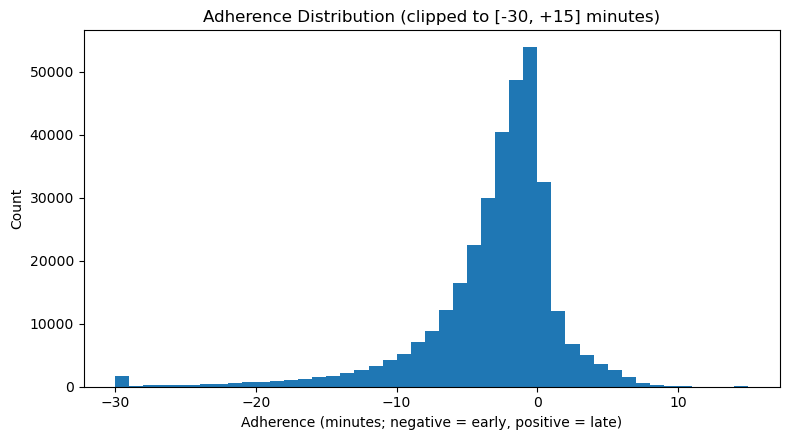

In [25]:
# Q1 — Overall OTP & Adherence Distribution (using canonical aliases)
# - What: Summarize on-time performance (OTP) and visualize the distribution of adherence.
# - Why: Establish a clear baseline of reliability and whether skew is driven by early or late departures.
# - How: Compute mean of DF_OTP['is_ontime']; show descriptive stats for ADHERENCE; plot a clipped histogram for readability.

import numpy as np
import pandas as pd
import math

# ---------- Helpers ----------
def _fmt_pct(x):
    return "n/a" if (x is None or pd.isna(x)) else f"{x:.1%}"

def _wilson_ci(k, n, z=1.96):
    """Wilson score interval for a proportion. Returns (p_hat, lo, hi) or (nan, nan, nan) if n=0."""
    if n == 0:
        return (np.nan, np.nan, np.nan)
    p = k / n
    denom = 1 + (z**2)/n
    center = (p + (z**2)/(2*n)) / denom
    margin = (z * math.sqrt((p*(1-p)/n) + (z**2)/(4*n*n))) / denom
    return (p, center - margin, center + margin)

def _describe_series(s: pd.Series):
    """Robust 1-line stats dict for a numeric series."""
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return {"count": 0, "mean": "n/a", "std": "n/a", "median": "n/a",
                "p10": "n/a", "p90": "n/a", "min": "n/a", "max": "n/a"}
    return {
        "count": int(s.size),
        "mean": round(s.mean(), 2),
        "std": round(s.std(ddof=1), 2),
        "median": round(s.median(), 2),
        "p10": round(s.quantile(0.10), 2),
        "p90": round(s.quantile(0.90), 2),
        "min": round(s.min(), 2),
        "max": round(s.max(), 2),
    }

# ---------- OTP metrics ----------
if 'DF_OTP' not in globals() or DF_OTP.empty:
    print("DF_OTP is not available or empty—run Step 0 first.")
else:
    # Overall OTP
    if "is_ontime" in DF_OTP.columns:
        k = int(pd.to_numeric(DF_OTP["is_ontime"], errors="coerce").fillna(0).sum())
        n = int(DF_OTP["is_ontime"].shape[0])
        p_hat, lo, hi = _wilson_ci(k, n)
        print("Overall OTP (policy-aligned):")
        print(f"  OTP = {_fmt_pct(p_hat)}  |  95% CI [{_fmt_pct(lo)}, {_fmt_pct(hi)}]  |  n = {n:,}\n")
    else:
        print("Column 'is_ontime' not found in DF_OTP.\n")

    # Early vs Late vs On-time mix (optional but helpful context)
    if "otp_label" in DF_OTP.columns:
        mix = (DF_OTP["otp_label"]
               .value_counts(dropna=False)
               .reindex(["On-time","Late","Early","Unclassified"])
               .fillna(0).astype(int))
        mix_pct = (mix / mix.sum()).map(lambda x: f"{x:.1%}" if mix.sum() else "n/a")
        out = pd.DataFrame({"count": mix, "share": mix_pct})
        print("Arrival/Departure classification mix:")
        print(out.to_string())
        print()

    # ---------- Adherence distribution ----------
    # Use the clipped helper if present; otherwise compute a clipped view on the fly.
    has_adh = "ADHERENCE" in DF_OTP.columns
    has_clip = "ADHERENCE_clip" in DF_OTP.columns

    if has_adh or has_clip:
        adh_src = "ADHERENCE_clip" if has_clip else "ADHERENCE"
        adh = pd.to_numeric(DF_OTP[adh_src], errors="coerce")
        stats_all = _describe_series(DF_OTP.get("ADHERENCE", pd.Series(dtype=float)))
        stats_clip = _describe_series(adh)

        print("Adherence (minutes) — descriptive stats")
        print("  Raw   :", stats_all)
        print("  Clipped ([-30, +15] for readability):", stats_clip)

        # Plot: histogram of clipped adherence
        try:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(8, 4.5))
            adh.dropna().plot(kind="hist", bins=45)
            plt.title("Adherence Distribution (clipped to [-30, +15] minutes)")
            plt.xlabel("Adherence (minutes; negative = early, positive = late)")
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"(Plot skipped — {e})")
    else:
        print("No ADHERENCE columns found; skipping adherence stats and plot.")


### 2) How does direction of travel, route, or location affect the on-time performance?

Top 10 Routes by OTP (policy-aligned):


,ROUTE_ABBR,route_name,otp,n
0,22,Bordeaux,89.3%,23960
1,23,Dickerson Pike,89.0%,39334
2,50,Charlotte Pike,85.7%,42557
3,56,Gallatin Pike,82.3%,58716
4,7,Hillsboro,78.0%,17000
5,52,Nolensville Pike,76.7%,49170
6,3,West End,76.1%,45099
7,55,Murfreesboro Pike,70.0%,60157


Bottom 10 Routes by OTP:


,ROUTE_ABBR,route_name,otp,n
0,55,Murfreesboro Pike,70.0%,60157
1,3,West End,76.1%,45099
2,52,Nolensville Pike,76.7%,49170
3,7,Hillsboro,78.0%,17000
4,56,Gallatin Pike,82.3%,58716
5,50,Charlotte Pike,85.7%,42557
6,23,Dickerson Pike,89.0%,39334
7,22,Bordeaux,89.3%,23960


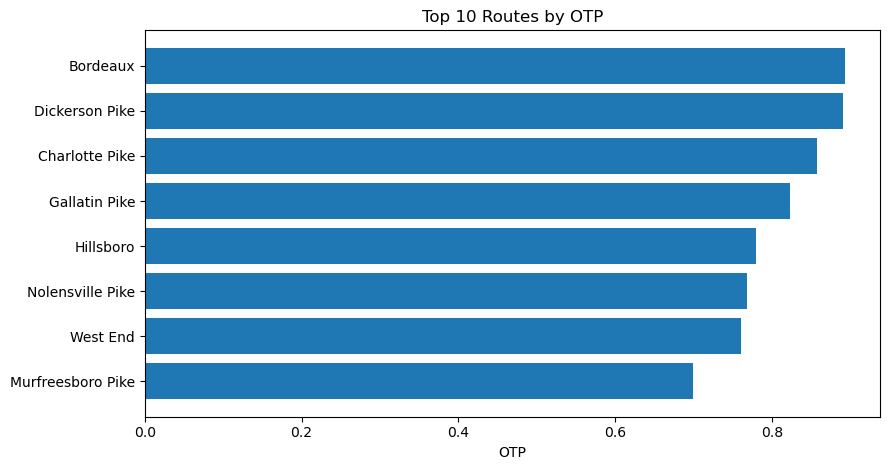


Directional Asymmetry (route × direction):


C:\Users\micha\AppData\Local\Temp\ipykernel_25048\1880832362.py:107: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = by_rdir.pivot_table(index=["ROUTE_ABBR","route_name"],


,ROUTE_ABBR,route_name,dir_asym,n_total
0,52,Nolensville Pike,16.1%,49170
1,3,West End,15.7%,45099
2,56,Gallatin Pike,12.3%,58716
3,7,Hillsboro,10.6%,17000
4,55,Murfreesboro Pike,10.6%,60157
5,22,Bordeaux,8.3%,23960
6,23,Dickerson Pike,3.9%,39334
7,50,Charlotte Pike,2.4%,42557



Downtown vs Non-Downtown (heuristic split):


,bucket,otp,n
0,Non-downtown,78.5%,265739
1,Downtown timepoints,85.4%,70254



Timepoint hotspots — highest late_rate (n ≥ 50):


,ROUTE_ABBR,route_name,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,timepoint_name,late_rate,n
0,22,Bordeaux,FROM DOWNTOWN,YGKG,CLARKSVILLE PIKE & ABERNATHY RD SB,48.0%,820
1,55,Murfreesboro Pike,FROM DOWNTOWN,MXBELL,BELL STATION OUTBOUND,46.6%,4951
2,52,Nolensville Pike,FROM DOWNTOWN,DCSCC,EZELL PIKE CONVENIENCE CTR WB,43.4%,1578
3,3,West End,FROM DOWNTOWN,WHBG,WHITE BRIDGE PIKE & CHARLOTTE SHONE,41.3%,2139
4,52,Nolensville Pike,FROM DOWNTOWN,HDANT,HARDING PL & ANTIOCH PK WB,39.6%,1988
5,55,Murfreesboro Pike,FROM DOWNTOWN,HHWM,HICKORY HOLLOW PL & HICKORY HOLLOW,35.6%,4936
6,55,Murfreesboro Pike,FROM DOWNTOWN,MXDONEL,DONELSON/DELL STATION OUTBOUND,35.5%,4956
7,3,West End,FROM DOWNTOWN,BRCJ,COLICE JEANNE RD & BAUGH RD SB,34.9%,2031
8,3,West End,FROM DOWNTOWN,HRWB,HARDING PIKE & BOSLEY SPRINGS RD WB,34.4%,4119
9,55,Murfreesboro Pike,TO DOWNTOWN,MXWHARF,WHARF STATION INBOUND,32.2%,5136


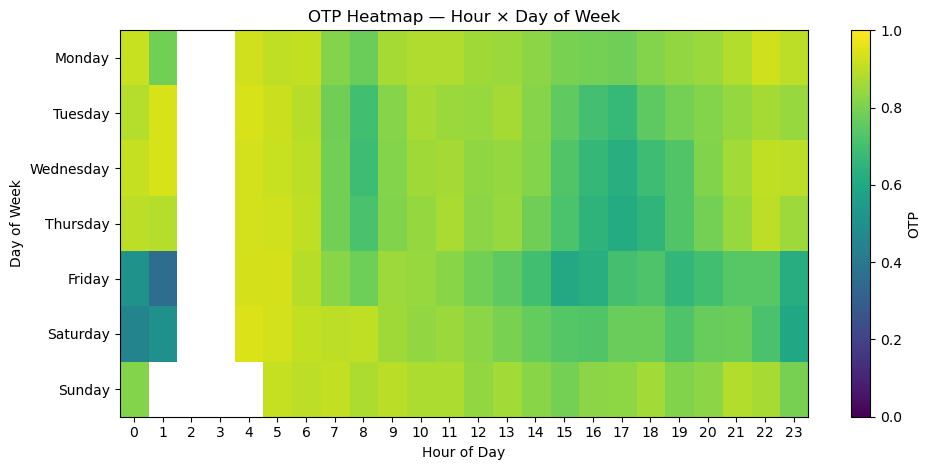

In [28]:
# Q2 — Effects of Direction, Route, and Location (using canonical aliases)
# - What: Compare OTP by route, direction, and timepoint; include a Downtown split and visuals.
# - Why: Identify corridors/timepoints driving performance and reveal directional asymmetry.
# - How: Use DF_OTP/BY_ROUTE/TP_HOT to compute tables with counts (n) and charts (Top 10 Routes, Hour×Day OTP heatmap).
# - Supports: Q2 (and informs Q9).

import numpy as np
import pandas as pd
from IPython.display import display

# ---------- helpers ----------
def _ensure(df: pd.DataFrame, cols):
    return all(c in df.columns for c in cols)

def _dow_ordered_cats(series):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return pd.Categorical(series, categories=order, ordered=True)

def _style_pct(df: pd.DataFrame, cols):
    """Return a Styler with percentage formatting for cols (if present)."""
    fmt = {c: "{:.1%}" for c in cols if c in df.columns}
    return df.style.format(fmt)

# ---------- availability check ----------
if 'DF_OTP' not in globals() or DF_OTP.empty:
    print("DF_OTP is not available or empty—run Step 0 first.")
else:
    # =========================
    # A) OTP by Route (Top / Bottom)
    # =========================
    if 'BY_ROUTE' in globals() and isinstance(BY_ROUTE, pd.DataFrame) and not BY_ROUTE.empty and _ensure(BY_ROUTE, ["ROUTE_ABBR","otp","n"]):
        by_route = BY_ROUTE.copy()
        # Attach route_name if missing
        if "route_name" not in by_route.columns and "route_name" in DF_OTP.columns:
            rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
            by_route["route_name"] = rn_map.reindex(by_route["ROUTE_ABBR"]).values
    else:
        # Rebuild safely from DF_OTP
        if _ensure(DF_OTP, ["ROUTE_ABBR","is_ontime"]):
            by_route = (DF_OTP.groupby("ROUTE_ABBR", as_index=False)
                               .agg(otp=("is_ontime","mean"), n=("is_ontime","size")))
            if "route_name" in DF_OTP.columns:
                rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
                by_route["route_name"] = rn_map.reindex(by_route["ROUTE_ABBR"]).values
            else:
                by_route["route_name"] = by_route["ROUTE_ABBR"].astype(str)
        else:
            by_route = pd.DataFrame(columns=["ROUTE_ABBR","route_name","otp","n"])

    if not by_route.empty:
        # Top 10: otp desc, then n desc
        top10 = (
            by_route.sort_values(["otp","n"], ascending=[False, False])
                    .loc[:, ["ROUTE_ABBR","route_name","otp","n"]]
                    .head(10)
                    .reset_index(drop=True)
        )
        # Bottom 10: otp asc, then n desc
        bottom10 = (
            by_route.sort_values(["otp","n"], ascending=[True, False])
                    .loc[:, ["ROUTE_ABBR","route_name","otp","n"]]
                    .head(10)
                    .reset_index(drop=True)
        )

        print("Top 10 Routes by OTP (policy-aligned):")
        display(_style_pct(top10, ["otp"]))
        print("Bottom 10 Routes by OTP:")
        display(_style_pct(bottom10, ["otp"]))
    else:
        print("No route-level data available.")

    # ---------- Visual: Top 10 Routes bar ----------
    try:
        import matplotlib.pyplot as plt
        if not by_route.empty:
            plot_top = (by_route.sort_values(["otp","n"], ascending=[False, False])
                                .head(10)
                                .copy())
            plt.figure(figsize=(9, 4.8))
            plt.barh(plot_top["route_name"].astype(str), plot_top["otp"])
            plt.gca().invert_yaxis()
            plt.xlabel("OTP")
            plt.title("Top 10 Routes by OTP")
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"(Top 10 Routes plot skipped — {e})")

    # =========================
    # B) Directional Asymmetry — OTP by route × direction
    # =========================
    print("\nDirectional Asymmetry (route × direction):")
    if _ensure(DF_OTP, ["ROUTE_ABBR","ROUTE_DIRECTION_NAME","is_ontime"]):
        by_rdir = (DF_OTP.groupby(["ROUTE_ABBR","ROUTE_DIRECTION_NAME"], observed=True)["is_ontime"]
                          .agg(["mean","size"]).reset_index()
                          .rename(columns={"mean":"otp","size":"n"}))

        # Attach route_name if available
        if "route_name" in DF_OTP.columns:
            rn_map = DF_OTP.drop_duplicates("ROUTE_ABBR").set_index("ROUTE_ABBR")["route_name"]
            by_rdir["route_name"] = by_rdir["ROUTE_ABBR"].map(rn_map).fillna(by_rdir["ROUTE_ABBR"].astype(str))
        else:
            by_rdir["route_name"] = by_rdir["ROUTE_ABBR"].astype(str)

        # Asymmetry per route
        pivot = by_rdir.pivot_table(index=["ROUTE_ABBR","route_name"],
                                    columns="ROUTE_DIRECTION_NAME",
                                    values="otp")
        pivot["dir_asym"] = pivot.max(axis=1) - pivot.min(axis=1)
        n_per = by_rdir.groupby(["ROUTE_ABBR","route_name"])["n"].sum()

        asym = (pivot[["dir_asym"]]
                .join(n_per)
                .reset_index()
                .sort_values(["dir_asym","n"], ascending=[False, False])
                .rename(columns={"n":"n_total"})
                .reset_index(drop=True))
        display(_style_pct(asym, ["dir_asym"]))
    else:
        print("Missing columns for route×direction breakdown.")

    # =========================
    # C) Downtown vs Non-Downtown split (heuristic)
    # =========================
    print("\nDowntown vs Non-Downtown (heuristic split):")
    if ("is_ontime" in DF_OTP.columns) and (("timepoint_name" in DF_OTP.columns) or ("TIME_POINT_ABBR" in DF_OTP.columns)):
        name_col = "timepoint_name" if "timepoint_name" in DF_OTP.columns else "TIME_POINT_ABBR"
        names = DF_OTP[name_col].astype(str).str.upper()
        downtown_mask = names.str.contains(r"DOWNTOWN|CENTRAL|MUSIC CITY|MCC|DCS|TRANSIT CENTER")
        split = (DF_OTP.assign(is_downtown=downtown_mask)
                        .groupby("is_downtown")["is_ontime"]
                        .agg(["mean","size"]).reset_index()
                        .rename(columns={"mean":"otp","size":"n"}))
        split["bucket"] = split["is_downtown"].map({True:"Downtown timepoints", False:"Non-downtown"})
        split = split.loc[:, ["bucket","otp","n"]]
        display(_style_pct(split, ["otp"]))
    else:
        print("No timepoint labels found to create a Downtown split.")

    # =========================
    # D) Timepoint Hotspots (worst lateness, min n threshold)
    # =========================
    thr = 50  # tweak for stability
    print(f"\nTimepoint hotspots — highest late_rate (n ≥ {thr}):")
    if 'TP_HOT' in globals() and isinstance(TP_HOT, pd.DataFrame) and not TP_HOT.empty and _ensure(TP_HOT, ["late_rate","n"]):
        hot = TP_HOT.loc[TP_HOT["n"] >= thr].copy()
        hot = hot.sort_values(["late_rate","n"], ascending=[False, False]).head(15).reset_index(drop=True)
        cols = [c for c in ["ROUTE_ABBR","route_name","ROUTE_DIRECTION_NAME","TIME_POINT_ABBR","timepoint_name","late_rate","n"] if c in hot.columns]
        display(_style_pct(hot.loc[:, cols], ["late_rate"]))
    else:
        print("TP_HOT table not available; run Step 0 or relax the threshold if the sample is small.")

# =========================
# E) Visual: Hour × Day OTP heatmap (show missing hours as white)
# =========================
if _ensure(DF_OTP, ["hour","dow","is_ontime"]):
    tmp = DF_OTP.loc[:, ["hour","dow","is_ontime"]].dropna().copy()
    tmp["hour"] = pd.to_numeric(tmp["hour"], errors="coerce")
    tmp = tmp[tmp["hour"].between(0, 23)]  # guard weird values
    tmp["dow"] = _dow_ordered_cats(tmp["dow"])

    # Build a complete 7×24 grid, so hours with no data (e.g., 2–3 AM) appear as NaN
    hours_full = list(range(24))
    grid = (tmp.groupby(["dow","hour"], observed=True)["is_ontime"]
               .mean()
               .unstack("hour")
               .reindex(columns=hours_full)   # <-- ensures 0..23 columns exist
               .sort_index())

    try:
        import matplotlib.pyplot as plt
        import numpy as np

        plt.figure(figsize=(10, 4.8))
        # make a copy of the colormap and map NaNs (bad values) to white
        cmap = plt.cm.viridis.copy()
        cmap.set_bad('white')

        arr = grid.to_numpy()
        im = plt.imshow(arr, aspect="auto", interpolation="nearest",
                        vmin=0, vmax=1, cmap=cmap)  # fixed scale 0..1

        plt.title("OTP Heatmap — Hour × Day of Week")
        plt.xlabel("Hour of Day")
        plt.ylabel("Day of Week")

        # ticks
        plt.xticks(range(len(hours_full)), hours_full, rotation=0)
        days = list(grid.index.astype(str))
        plt.yticks(range(len(days)), days)

        cb = plt.colorbar(im)
        cb.set_label("OTP")

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(Heatmap skipped — {e})")
else:
    print("Missing hour/dow/is_ontime for heatmap.")




### 3) How does time of day or day of week affect on-time performance?

OTP by Day of Week (Mon→Sun):


,dow,otp,n
0,Monday,84.3%,47686
1,Tuesday,80.4%,56481
2,Wednesday,79.3%,56633
3,Thursday,78.6%,55868
4,Friday,75.3%,55388
5,Saturday,79.3%,35888
6,Sunday,85.5%,28049


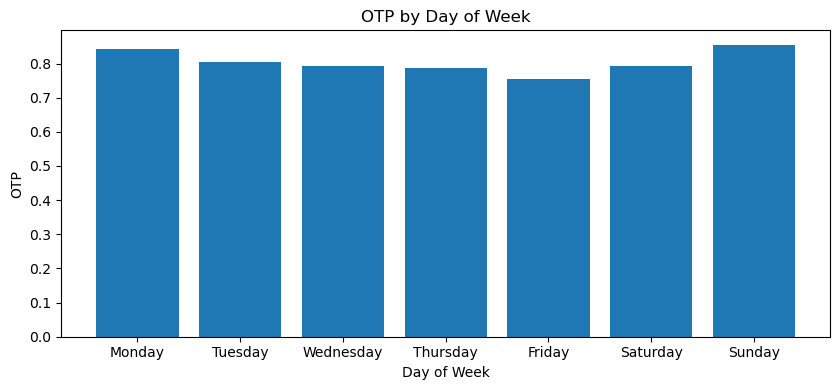

OTP by Hour of Day:


,hour,otp
0,0,75.7%
1,1,71.2%
2,2,nan%
3,3,nan%
4,4,93.5%
5,5,92.2%
6,6,89.9%
7,7,81.5%
8,8,75.7%
9,9,83.9%


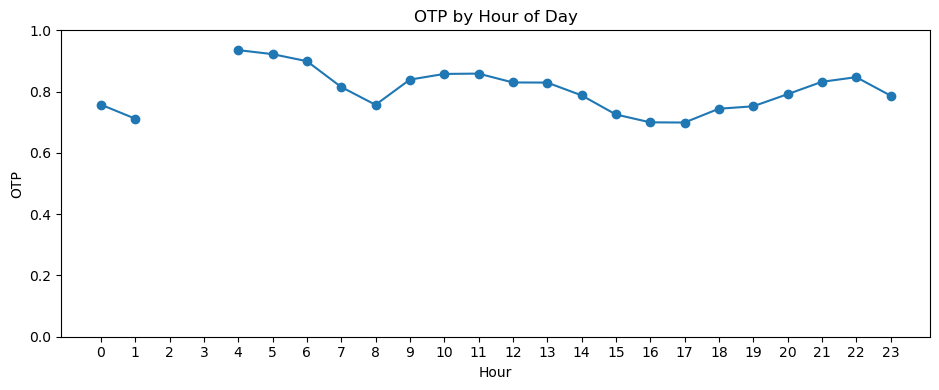

Peak vs Off-peak OTP:


,peak,otp,n
0,Peak,75.9%,121691
1,Off-peak,82.3%,214302


In [29]:
# Q3 — Time of Day / Day of Week (using canonical aliases)
# - What: Compare OTP by hour, peak window, and day-of-week (ordered Mon→Sun).
# - Why: Reveal rush-hour and weekday/weekend patterns to inform scheduling and staffing.
# - How: Groupby DF_OTP for means; ordered bar chart for DOW; line chart for hour; include peak vs off-peak table with counts.

import numpy as np
import pandas as pd
from IPython.display import display

# ---------- helpers ----------
def _ensure(df: pd.DataFrame, cols):
    return all(c in df.columns for c in cols)

def _dow_ordered(series):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return pd.Categorical(series, categories=order, ordered=True)

def _style_pct(df: pd.DataFrame, pct_cols):
    return df.style.format({c: "{:.1%}" for c in pct_cols if c in df.columns})

# ---------- availability check ----------
need_cols = ["is_ontime", "hour", "dow"]
if 'DF_OTP' not in globals() or DF_OTP.empty or not _ensure(DF_OTP, need_cols):
    print("DF_OTP missing or lacks required columns (is_ontime, hour, dow). Run Step 0 first.")
else:
    # Build a clean working slice
    cols = ["is_ontime","hour","dow"]
    if "peak" in DF_OTP.columns: cols.append("peak")
    dfx = DF_OTP.loc[:, cols].copy()

    # Normalize inputs
    dfx["hour"] = pd.to_numeric(dfx["hour"], errors="coerce")
    dfx = dfx[dfx["hour"].between(0, 23)]
    dfx["dow"] = _dow_ordered(dfx["dow"])

    # Ensure peak label exists (recreate if absent)
    if "peak" not in dfx.columns:
        PEAK_AM = (7, 9)
        PEAK_PM = (16, 18)
        dfx["peak"] = np.where(
            dfx["hour"].between(*PEAK_AM) | dfx["hour"].between(*PEAK_PM),
            "Peak", "Off-peak"
        )

    # =========================
    # A) OTP by Day of Week (ordered Mon→Sun)
    # =========================
    by_dow = (dfx.groupby("dow", observed=True)["is_ontime"]
                 .agg(otp="mean", n="size")
                 .reset_index()
                 .rename(columns={"is_ontime":"otp"}))
    # Present as DataFrame with percent formatting
    print("OTP by Day of Week (Mon→Sun):")
    display(_style_pct(by_dow, ["otp"]))

    # Visual: ordered Mon→Sun bar
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8.5, 4.0))
        plt.bar(by_dow["dow"].astype(str), by_dow["otp"])
        plt.title("OTP by Day of Week")
        plt.xlabel("Day of Week")
        plt.ylabel("OTP")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(DOW bar chart skipped — {e})")

    # =========================
    # B) OTP by Hour of Day (0–23)
    # =========================
    hours_full = list(range(24))
    by_hour = (dfx.groupby("hour", observed=True)["is_ontime"]
                  .mean()
                  .reindex(hours_full)        # show all hours, even if missing (NaN)
                  .reset_index()
                  .rename(columns={"is_ontime":"otp"}))
    print("OTP by Hour of Day:")
    display(_style_pct(by_hour, ["otp"]))

    # Visual: hourly line
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(9.5, 4.0))
        plt.plot(by_hour["hour"], by_hour["otp"], marker="o")
        plt.title("OTP by Hour of Day")
        plt.xlabel("Hour")
        plt.ylabel("OTP")
        plt.xticks(hours_full)
        plt.ylim(0, 1)  # keeps scale interpretable across datasets
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(Hourly line plot skipped — {e})")

    # =========================
    # C) Peak vs Off-peak table (with counts)
    # =========================
    by_peak = (dfx.groupby("peak", observed=True)["is_ontime"]
                  .agg(otp="mean", n="size")
                  .reset_index())
    # Sort Peak first for readability
    by_peak["peak"] = pd.Categorical(by_peak["peak"], categories=["Peak","Off-peak"], ordered=True)
    by_peak = by_peak.sort_values("peak").reset_index(drop=True)
    print("Peak vs Off-peak OTP:")
    display(_style_pct(by_peak, ["otp"]))


### 4) How much of a factor does the driver have on on-time performance? The driver is indicated by the OPERATOR variable.

Saved: ..\data\figures\best10_operators_adjusted_effect.png
Saved: ..\data\figures\worst10_operators_adjusted_effect.png



### What these charts show (in plain English)

- **Each bar is a driver** (we show a friendly alias instead of their ID).
- The bar measures the driver’s **adjusted effect on on-time performance**, in **percentage points (pp)**.
- *Adjusted* means we’ve already accounted for the route and direction they were on, the **day of week**, and the **hour of day**.
  - In other words, we **compare drivers to what would be expected** given their assignments and time-of-day mix.
- **Positive bars** (to the right) mean the driver’s trips were **more on-time than expected**;  
  **negative bars** mean **less on-time than expected**.

**How to interpret:**
- A bar of **+2.5 pp** means this driver’s trips were, on average, **2.5 percentage points more on-time** than we’d expect for the same routes, directions, days, and hours.
- We **only include drivers with at least 200 trips** (or stops) in the analysis to avoid noisy small samples.
- This does **not prove causation**. It isolates a **driver-attributable signal** after controlling for assignment/time patterns, but other unobserved factors may remain.

**What you can do with this:**
- For improvement: look at **common practices** among the top group (e.g., departure discipline at early stops, recovery time habits).
- For coaching: the bottom group indicates where **targeted feedback or schedule support** might have impact.


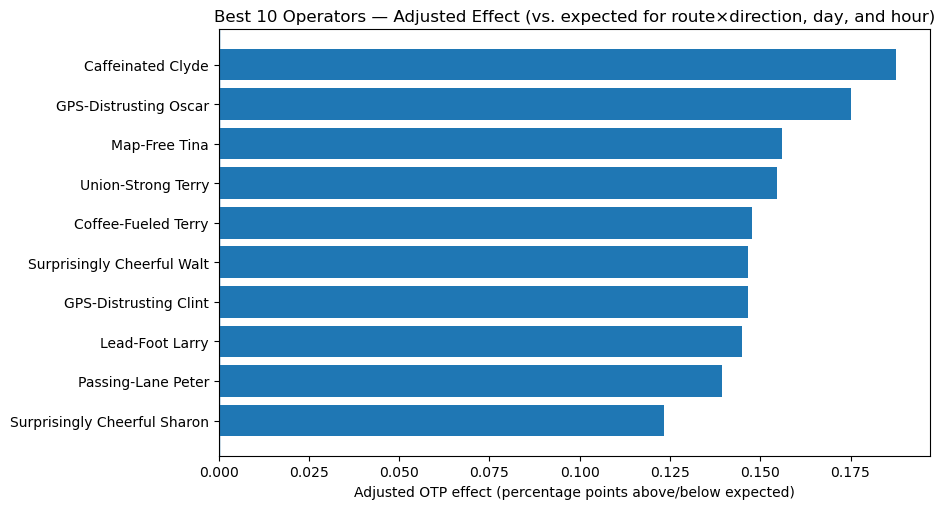

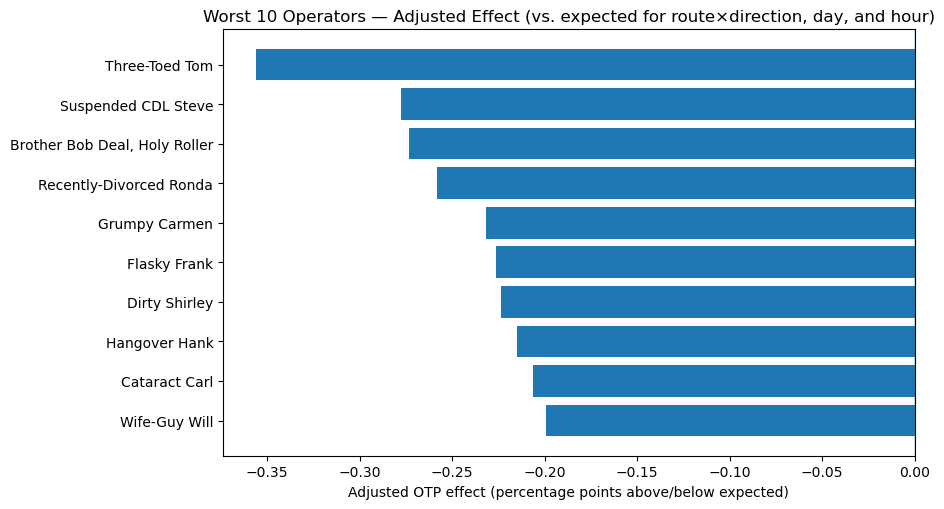

In [36]:
# Q4 — Stakeholder Graphics (no bar labels) with custom operator_id→name mapping

import pandas as pd, numpy as np
from pathlib import Path
from IPython.display import display, Markdown

# -------- custom operator name map (from user) --------
operator_name_map = {
    56:'Grumpy Marv',235:'Chatty Dottie',244:'No-Nonsense Earl',301:'Sleep-Deprived Sharon',
    304:'Overcaffeinated Gus',326:'Union Skeptic Clint',329:'Union Scab Darla',332:'Chronically Late Ralph',
    341:'Surprisingly Cheerful Nancy',357:'Suspended CDL Steve',359:'Seatbelt-Optional Carmen',
    375:'Horn-Happy Ed',379:'High-Visibility Tina',409:'Thermos-Powered Stan',414:'Veteran Lois',
    465:'Coffee-Fueled Jerry',471:'Early-Shift Tamika',517:'Map-Free Doug',520:'Snack-Driven Velma',
    522:'Cautiously Optimistic Clarence',559:'GPS-Distrusting Paula',572:'Radio-DJ Chuck',611:'Zen-Like Mabel',
    624:'Pothole-Detecting Rita',653:'Safety-Vesting Phil',656:'Grumpy Terry',659:'Chatty Janelle',
    723:'Passing-Lane Peter',778:'Sleep-Deprived Walt',785:'Overcaffeinated Cheryl',907:'Scab Ron',
    1016:'Mildly Annoyed Debbie',1040:'Regional Regina',1052:'Surprisingly Cheerful Randy',
    1078:'Weathered Nadine',1133:'Seatbelt-Optional Oscar',1147:'Horn-Happy Gladys',1170:'High-Visibility Dean',
    1175:'Thermos-Powered Clyde',1177:'Veteran Anita',1190:'Coffee-Fueled Marv',1198:'Early-Shift Dottie',
    1202:'Map-Free Earl',1204:'Snack-Driven Sharon',1206:'Cautiously Optimistic Gus',1208:'GPS-Distrusting Clint',
    1222:'Radio-DJ Darla',1237:'Zen-Like Ralph',1251:'Pothole-Detecting Nancy',1266:'Safety-Vesting Frank',
    1277:'Grumpy Carmen',1305:'Chatty Ed',1330:'No-Nonsense Tina',1343:'Sleep-Deprived Stan',
    1352:'Overcaffeinated Lois',1359:'Union-Strong Jerry',1361:'Mildly Annoyed Tamika',1362:'Chronically Late Doug',
    1363:'Surprisingly Cheerful Velma',1368:'Weathered Clarence',1372:'Seatbelt-Optional Paula',
    1379:'Horn-Happy Chuck',1389:'High-Visibility Mabel',1391:'Thermos-Powered Rita',1394:'Four-Eyed Willie',
    1401:'Coffee-Fueled Terry',1406:'Early-Shift Janelle',1410:'Map-Free Hector',1419:'Snack-Driven Walt',
    1457:'Cautiously Optimistic Cheryl',1489:'GPS-Distrusting Ron',1500:'Radio-DJ Debbie',1505:'Zen-Like Regina',
    1524:'Pothole-Detecting Randy',1542:'Safety-Vesting Nadine',1566:'Grumpy Oscar',1582:'Chatty Gladys',
    1590:'No-Nonsense Dean',1593:'Sleep-Deprived Clyde',1596:'Overcaffeinated Anita',1597:'Marv',
    1598:'Mildly Annoyed Dottie',1601:'Chronically Late Earl',1603:'Surprisingly Cheerful Sharon',
    1606:'Weathered Gus',1617:'Seatbelt-Optional Clint',1619:'Horn-Happy Darla',1621:'High-Visibility Ralph',
    1623:'Thermos-Powered Nancy',1650:'Veteran Frank',1673:'Coffee-Fueled Carmen',1682:'Early-Shift Ed',
    1703:'Map-Free Tina',1705:'Snack-Driven Stan',1706:'Cautiously Optimistic Lois',1713:'GPS-Distrusting Jerry',
    1716:'Radio-DJ Tamika',1717:'Zen-Like Doug',1730:'Pothole-Detecting Velma',1736:'Safety-Vesting Clarence',
    1742:'Grumpy Paula',1743:'Chatty Chuck',1761:'No-Nonsense Mabel',1762:'Sleep-Deprived Rita',
    1763:'Overcaffeinated Phil',1780:'Union-Strong Terry',1782:'Mildly Annoyed Janelle',
    1788:'Chronically Late Hector',1792:'Surprisingly Cheerful Walt',1797:'Weathered Cheryl',1800:'Flasky Frank',
    1814:'Horn-Happy Debbie',1815:'High-Visibility Regina',1823:'Thermos-Powered Randy',1824:'Veteran Nadine',
    1838:'Coffee-Fueled Oscar',1842:'Early-Shift Gladys',1845:'Map-Free Dean',1848:'Snack-Driven Clyde',
    1865:'Cautiously Optimistic Anita',1866:'GPS-Distrusting Marv',1867:'Radio-DJ Dottie',1880:'Zen-Like Earl',
    1889:'Pothole-Detecting Sharon',1892:'Safety-Vesting Gus',1893:'Grumpy Clint',1904:'Three-Toed Tom',
    1914:'No-Nonsense Ralph',1915:'Sleep-Deprived Nancy',1922:'Overcaffeinated Frank',1927:'Union-Strong Carmen',
    1938:'Mildly Annoyed Ed',1948:'Chronically Late Tina',1958:'Surprisingly Cheerful Stan',1984:'Weathered Lois',
    1992:'Seatbelt-Optional Jerry',1997:'Horn-Happy Tamika',2001:'High-Visibility Doug',2012:'Thermos-Powered Velma',
    2029:'Veteran Clarence',2033:'Coffee-Fueled Paula',2040:'Early-Shift Chuck',2041:'Map-Free Mabel',
    2053:'Snack-Driven Rita',2055:'Cautiously Optimistic Phil',2059:'GPS-Distrusting Terry',
    2062:'Radio-DJ Janelle',2082:'Zen-Like Hector',2088:'Pothole-Detecting Walt',2094:'Safety-Vesting Cheryl',
    2102:'Grumpy Ron',2103:'Chatty Debbie',2109:'No-Nonsense Regina',2112:'Sleep-Deprived Randy',
    2125:'Overcaffeinated Nadine',2126:'Union-Strong Oscar',2127:'Mildly Annoyed Gladys',2137:'Chronically Late Dean',
    2138:'Surprisingly Cheerful Clyde',2151:'Weathered Anita',2161:'Seatbelt-Optional Marv',2164:'Horn-Happy Dottie',
    2177:'High-Visibility Earl',2178:'Thermos-Powered Sharon',2200:'Lead-Foot Larry',2207:'Coffee-Fueled Clint',
    2217:'Early-Shift Darla',2221:'Map-Free Ralph',2228:'Snack-Driven Nancy',2230:'Cautiously Optimistic Frank',
    2246:'GPS-Distrusting Carmen',2253:'Radio-DJ Ed',2254:'Zen-Like Tina',2256:'Silent Stan',
    2294:'Safety-Vesting Lois',2306:'Grumpy Jerry',2309:'Chatty Tamika',2312:'Recently-Divorced Ronda',
    2313:'Sleep-Deprived Velma',2321:'Overcaffeinated Clarence',2322:'Union-Strong Paula',
    2324:'Mildly Annoyed Chuck',2332:'Chronically Late Mabel',2335:'Surprisingly Cheerful Rita',
    2338:'Weathered Phil',2348:'Seatbelt-Optional Terry',2352:'Horn-Happy Janelle',2355:'High-Visibility Hector',
    2356:'Thermos-Powered Walt',2357:'Veteran Cheryl',2362:'Coffee-Fueled Ron',2368:'Early-Shift Debbie',
    2371:'Map-Free Regina',2374:'Snack-Driven Randy',2377:'Cautiously Optimistic Nadine',2399:'GPS-Distrusting Oscar',
    2400:'Radio-DJ Gladys',2424:'Zen-Like Dean',2427:'Pothole-Detecting Clyde',2428:'Safety-Vesting Anita',
    2432:'Grumpy Marv',2440:'Chatty Dottie',2441:'No-Nonsense Earl',2448:'Sleep-Deprived Sharon',
    2458:'Overcaffeinated Gus',2459:'Union-Strong Clint',2464:'Mildly Annoyed Darla',2472:'Chronically Late Ralph',
    2479:'Surprisingly Cheerful Nancy',2493:'Weathered Frank',2494:'Seatbelt-Optional Carmen',2497:'Horn-Happy Ed',
    2500:'High-Visibility Tina',2503:'Thermos-Powered Stan',2505:'Veteran Lois',2512:'Coffee-Fueled Jerry',
    2529:'Early-Shift Tamika',2530:'Map-Free Doug',2531:'Snack-Driven Velma',2534:'Cautiously Optimistic Clarence',
    2545:'GPS-Distrusting Paula',2546:'Radio-DJ Chuck',2547:'Zen-Like Mabel',2549:'Pothole-Detecting Rita',
    2560:'Safety-Vesting Phil',2563:'Grumpy Terry',2567:'Chatty Janelle',2569:'No-Nonsense Hector',
    2573:'Off-Road Orwell',2577:'Overcaffeinated Cheryl',2580:'Union-Strong Ron',2584:'Mildly Annoyed Debbie',
    2585:'Bumper-Car Bart',2586:'Surprisingly Cheerful Randy',2590:'Weathered Nadine',2594:'Seatbelt-Optional Oscar',
    2600:'Horn-Happy Gladys',2603:'High-Visibility Dean',2610:'Caffeinated Clyde',2618:'Veteran Anita',
    2623:'Coffee-Fueled Marv',2624:'Early-Shift Dottie',2629:'Map-Free Earl',2630:'Snack-Driven Sharon',
    2638:'Cautiously Optimistic Gus',2639:'GPS-Distrusting Clint',2642:'Radio-DJ Darla',2646:'Zen-Like Ralph',
    2649:'Pothole-Detecting Nancy',2662:'Safety-Vesting Frank',2669:'Grumpy Carmen',2675:'Chatty Ed',
    2689:'No-Nonsense Tina',2693:'Sleep-Deprived Stan',2694:'Overcaffeinated Lois',2697:'Union-Strong Jerry',
    2703:'Mildly Annoyed Tamika',2706:'Chronically Late Doug',2714:'Surprisingly Cheerful Velma',
    2733:'Weathered Clarence',2747:'Seatbelt-Optional Paula',2751:'Horn-Happy Chuck',2752:'High-Visibility Mabel',
    2760:'Thermos-Powered Rita',2762:'Veteran Phil',2764:'Coffee-Fueled Terry',2765:'Early-Shift Janelle',
    2779:'Map-Free Hector',2780:'Snack-Driven Walt',2783:'Hangover Hank',2784:'GPS-Distrusting Ron',
    2792:'Radio-DJ Debbie',2793:'Zen-Like Regina',2809:'Pothole-Detecting Randy',2817:'Safety-Vesting Nadine',
    2821:'Grumpy Oscar',2832:'Chatty Gladys',2876:'No-Nonsense Dean',2943:'Sleep-Deprived Clyde',
    2954:'Overcaffeinated Anita',2958:'Union-Strong Marv',2962:'Mildly Annoyed Dottie',2963:'Chronically Late Earl',
    2967:'Surprisingly Cheerful Sharon',2969:'Weathered Gus',2972:'Seatbelt-Optional Clint',2976:'Horn-Happy Darla',
    2978:'High-Visibility Ralph',2982:'Thermos-Powered Nancy',2987:'Veteran Frank',2989:'Coffee-Fueled Carmen',
    2990:'Early-Shift Ed',3001:'Map-Free Tina',3012:'Snack-Driven Stan',3013:'Cautiously Optimistic Lois',
    3015:'GPS-Distrusting Jerry',3016:'Radio-DJ Tamika',3020:'Zen-Like Doug',3027:'Pothole-Detecting Velma',
    3031:'Safety-Vesting Clarence',3035:'Grumpy Paula',3064:'Chatty Chuck',3077:'No-Nonsense Mabel',
    3079:'Sleep-Deprived Rita',3087:'Overcaffeinated Phil',3088:'Union-Strong Terry',3090:'Mildly Annoyed Janelle',
    3093:'Chronically Late Hector',3096:'Wife-Guy Will',3098:'Dirty Shirley',3099:'Seatbelt-Optional Ron',
    3100:'Horn-Happy Debbie',3101:'Cataract Carl',3102:'Thermos-Powered Randy',3103:'Veteran Nadine',
    3116:'Coffee-Fueled Oscar',3118:'Early-Shift Gladys',3120:'Brother Bob Deal, Holy Roller',
    3122:'Snack-Driven Clyde',3124:'Cautiously Optimistic Anita',3126:'GPS-Distrusting Marv',
    3127:'Radio-DJ Dottie',3128:'Zen-Like Earl',3129:'Pothole-Detecting Sharon',3134:'Safety-Vesting Gus',
    3138:'Grumpy Clint',3140:'Chatty Darla',3142:'No-Nonsense Ralph',3144:'Sleep-Deprived Nancy',
    3149:'Overcaffeinated Frank',3156:'Union-Strong Carmen',3165:'Mildly Annoyed Ed',3166:'Chronically Late Tina',
    3173:'Surprisingly Cheerful Stan'
}

# -------- helpers --------
def _ensure(df, cols): return all(c in df.columns for c in cols)

def _find_operator_col(df):
    exact = [c for c in df.columns if c.upper() in {"OPERATOR","OPERATOR_ID","OPERATOR_ABBR"}]
    if exact: return exact[0]
    fuzzy = [c for c in df.columns if c.upper().startswith("OPERATOR")]
    return fuzzy[0] if fuzzy else None

def _dow_order(series):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return pd.Categorical(series, categories=order, ordered=True)

def _humanize(series):
    import hashlib
    first = ["Alex","Taylor","Jordan","Casey","Morgan","Riley","Avery","Quinn","Sam","Jamie",
             "Cameron","Drew","Parker","Reese","Rowan","Logan","Emerson","Blake","Elliot","Hayden"]
    last  = ["Brooks","Carter","Hayes","Jensen","Kelly","Lane","Morris","Parker","Reed","Shaw",
             "Bailey","Cooper","Foster","Harper","Hughes","Kennedy","Marshall","Miller","Morgan","Spencer"]
    out = {}
    for k in series.dropna().astype(str).unique():
        h = int(hashlib.md5(k.encode()).hexdigest(), 16)
        out[k] = f"{first[h % len(first)]} {last[(h//97) % len(last)]}"
    return series.astype(str).map(out)

def _apply_name_map(op_series: pd.Series, name_map: dict):
    # Try numeric lookup first (int keys), fallback to hash-based names for missing
    op_num = pd.to_numeric(op_series, errors="coerce").astype("Int64")
    mapped = op_num.map(name_map)
    missing = mapped.isna()
    if missing.any():
        mapped.loc[missing] = _humanize(op_series.astype(str).loc[missing])
    return mapped.astype(str)

def _compute_operator_effects(df_otp: pd.DataFrame, min_n=200):
    op_col = _find_operator_col(df_otp)
    if not op_col:
        raise ValueError("No OPERATOR column found.")
    need = [op_col, "is_ontime", "ROUTE_ABBR", "ROUTE_DIRECTION_NAME", "hour", "dow"]
    if not _ensure(df_otp, need):
        raise ValueError("DF_OTP is missing required columns.")

    dfx = df_otp.loc[:, need].copy()
    dfx["is_ontime"] = pd.to_numeric(dfx["is_ontime"], errors="coerce")
    dfx["hour"] = pd.to_numeric(dfx["hour"], errors="coerce")
    dfx = dfx.dropna(subset=["is_ontime","ROUTE_ABBR","ROUTE_DIRECTION_NAME","hour","dow"])
    dfx = dfx[dfx["hour"].between(0,23)]
    dfx["dow"] = _dow_order(dfx["dow"])
    dfx["route_dir_key"] = dfx["ROUTE_ABBR"].astype(str) + "|" + dfx["ROUTE_DIRECTION_NAME"].astype(str)
    dfx["operator_id"] = dfx[op_col].astype(str)

    overall = float(dfx["is_ontime"].mean())

    # Controls-only predicted probability per (route_dir_key, dow, hour)
    ctrl_key = ["route_dir_key","dow","hour"]
    p_ctrl = (dfx.groupby(ctrl_key, observed=True)["is_ontime"].mean().rename("p_ctrl"))
    dfx = dfx.join(p_ctrl, on=ctrl_key)
    dfx["p_ctrl"] = dfx["p_ctrl"].fillna(overall)

    # Residual & per-operator aggregation
    dfx["_resid"] = dfx["is_ontime"] - dfx["p_ctrl"]
    op_eff = (dfx.groupby("operator_id", observed=True)
                .agg(n=("is_ontime","size"),
                     raw_otp=("is_ontime","mean"),
                     adj_effect=("_resid","mean"))
                .reset_index())
    op_eff["adj_otp"] = (overall + op_eff["adj_effect"]).clip(0,1)

    # Apply your custom names (fallback to friendly hash where missing)
    op_eff["operator_name"] = _apply_name_map(op_eff["operator_id"], operator_name_map)

    # Stability filter & sort
    op_stable = op_eff[op_eff["n"] >= min_n].copy()
    op_stable = op_stable.sort_values(["adj_effect","n"], ascending=[False, False]).reset_index(drop=True)
    return op_stable, overall

def _plot_top_bottom(op_stable: pd.DataFrame, overall: float, save_dir: Path):
    import matplotlib.pyplot as plt

    # Top 10 (largest effect first) and Worst 10 (most negative first)
    best10  = op_stable.head(10).copy()
    worst10 = op_stable.sort_values(["adj_effect","n"], ascending=[True, False]).head(10).copy()

    def _barh(df, title, fname):
        if df.empty:
            print(f"(No data for {title})")
            return None
        labels = df["operator_name"].astype(str).values
        vals   = df["adj_effect"].values
        fig, ax = plt.subplots(figsize=(9.5, 5.2))
        ax.barh(labels, vals)
        ax.invert_yaxis()  # first row at the top
        ax.set_title(title)
        ax.set_xlabel("Adjusted OTP effect (percentage points above/below expected)")
        ax.axvline(0, linewidth=1)
        fig.tight_layout()
        if save_dir:
            save_dir.mkdir(parents=True, exist_ok=True)
            fp = save_dir / fname
            fig.savefig(fp, dpi=200, bbox_inches="tight")
            print(f"Saved: {fp}")
        return fig, ax

    figdir = save_dir
    _barh(best10, 
          "Best 10 Operators — Adjusted Effect (vs. expected for route×direction, day, and hour)",
          "best10_operators_adjusted_effect.png")
    _barh(worst10,
          "Worst 10 Operators — Adjusted Effect (vs. expected for route×direction, day, and hour)",
          "worst10_operators_adjusted_effect.png")

    return best10, worst10

# ---- run ----
MIN_N = 200
fig_out = Path("../data/figures")

if 'op_stable' in globals() and isinstance(op_stable, pd.DataFrame) and not op_stable.empty:
    _op = op_stable.copy()
    # Ensure names use your mapping
    _op["operator_name"] = _apply_name_map(_op["operator_id"], operator_name_map)
    overall = float(DF_OTP["is_ontime"].mean())
else:
    _op, overall = _compute_operator_effects(DF_OTP, min_n=MIN_N)

best10, worst10 = _plot_top_bottom(_op, overall, save_dir=fig_out)

# Layman’s explanations (Markdown) for stakeholders
display(Markdown(
"""
### What these charts show (in plain English)

- **Each bar is a driver** (we show a friendly alias instead of their ID).
- The bar measures the driver’s **adjusted effect on on-time performance**, in **percentage points (pp)**.
- *Adjusted* means we’ve already accounted for the route and direction they were on, the **day of week**, and the **hour of day**.
  - In other words, we **compare drivers to what would be expected** given their assignments and time-of-day mix.
- **Positive bars** (to the right) mean the driver’s trips were **more on-time than expected**;  
  **negative bars** mean **less on-time than expected**.

**How to interpret:**
- A bar of **+2.5 pp** means this driver’s trips were, on average, **2.5 percentage points more on-time** than we’d expect for the same routes, directions, days, and hours.
- We **only include drivers with at least {min_n} trips** (or stops) in the analysis to avoid noisy small samples.
- This does **not prove causation**. It isolates a **driver-attributable signal** after controlling for assignment/time patterns, but other unobserved factors may remain.

**What you can do with this:**
- For improvement: look at **common practices** among the top group (e.g., departure discipline at early stops, recovery time habits).
- For coaching: the bottom group indicates where **targeted feedback or schedule support** might have impact.
"""
.replace("{min_n}", str(MIN_N))
))

### 5) Is there any relationship between lateness (ADHERENCE) and headway deviation?
The headway deviation variable is contained in the HDWY_DEV column.
See the notes under number 9 for a description of headway and headway deviation.

Pearson r(ADHERENCE, hdwy_pct_dev) = -0.213  (n=263,665)


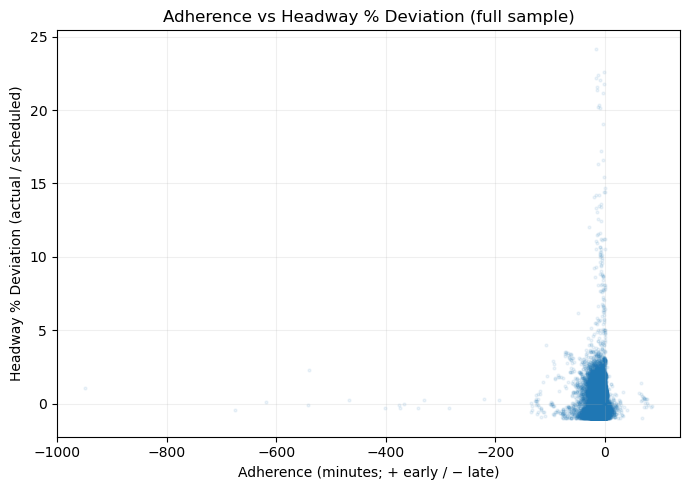

,hdwy_band,n,otp,adh_mean,adh_median,adh_std
0,Bunched (<50%),241924,0.834808,-2.971562,-2.033333,5.414310
1,Normal (50–150%),19757,0.357595,-8.550497,-7.716666,9.664378
2,Gapped (>150%),1984,0.296875,-13.732199,-10.516666,17.609567


C:\Users\micha\AppData\Local\Temp\ipykernel_2720\3134425417.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bp_data, labels=order, showfliers=False)


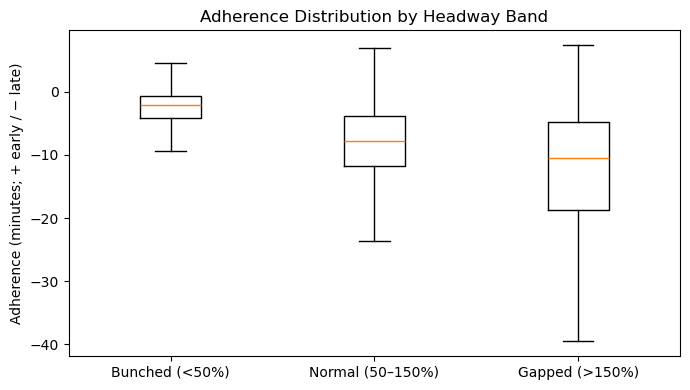

In [20]:
# Q5 — ADHERENCE vs Headway Deviation (using canonical aliases)
# - What: Quantify and visualize the relationship between adherence and headway % deviation.
# - Why: Reveal whether earliness/lateness aligns with bunching (<50%) or gapping (>150%).
# - How: Correlation + full scatter (alpha), simple linear fit, and banded stats (n, adherence mean/std/median, OTP).
# - Supports: Q5, Q9.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = DF_OTP.copy()

# Guard: need both adherence and headway % deviation
mask = df["ADHERENCE"].notna() & df["hdwy_pct_dev"].notna() & np.isfinite(df["hdwy_pct_dev"])
sub  = df.loc[mask, ["ADHERENCE","hdwy_pct_dev","is_ontime"]].copy()

# ---- Correlation ----
pearson = sub["ADHERENCE"].corr(sub["hdwy_pct_dev"])
print(f"Pearson r(ADHERENCE, hdwy_pct_dev) = {pearson:.3f}  (n={len(sub):,})")

# ---- Scatter with light alpha + simple linear fit ----
plt.figure(figsize=(7,5))
plt.scatter(sub["ADHERENCE"], sub["hdwy_pct_dev"], s=4, alpha=0.08)

# Fit y = a*x + b (robust enough for directionality)
a, b = np.polyfit(sub["ADHERENCE"].values, sub["hdwy_pct_dev"].values, 1)
xline = np.linspace(sub["ADHERENCE"].quantile(0.01), sub["ADHERENCE"].quantile(0.99), 100)
yline = a*xline + b
plt.plot(xline, yline, linewidth=2)

plt.title("Adherence vs Headway % Deviation (full sample)")
plt.xlabel("Adherence (minutes; + early / − late)")
plt.ylabel("Headway % Deviation (actual / scheduled)")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# ---- Banded adherence statistics by headway reliability band ----
# Bands: <0.5 (bunched), 0.5–1.5 (normal), >1.5 (gapped)
band = pd.cut(
    df["hdwy_pct_dev"],
    [-np.inf, 0.5, 1.5, np.inf],
    labels=["Bunched (<50%)","Normal (50–150%)","Gapped (>150%)"]
)
band_stats = (
    df.assign(hdwy_band=band)
      .groupby("hdwy_band", observed=True)
      .agg(
          n=("is_ontime","size"),
          otp=("is_ontime","mean"),
          adh_mean=("ADHERENCE","mean"),
          adh_median=("ADHERENCE","median"),
          adh_std=("ADHERENCE","std")
      )
      .reset_index()
      .sort_values("n", ascending=False)
)
display(band_stats)

# ---- (Optional) Boxplot: adherence spread within bands (helps the story) ----
# Order bands explicitly for consistent visuals
order = ["Bunched (<50%)","Normal (50–150%)","Gapped (>150%)"]
bp_data = [df.loc[band==lbl, "ADHERENCE"].dropna() for lbl in order]

plt.figure(figsize=(7,4))
plt.boxplot(bp_data, labels=order, showfliers=False)
plt.title("Adherence Distribution by Headway Band")
plt.ylabel("Adherence (minutes; + early / − late)")
plt.tight_layout()
plt.show()


### 6) How much impact does being late or too spaced out at the first stop have downstream?

,downstream_otp,n,first_adh_center
0,0.464218,54203,-7.216666
1,0.805125,54204,-3.366666
2,0.866119,54033,-1.783333
3,0.883611,53579,-0.166666
4,0.911396,53711,3.433333


,first_adh_round,downstream_otp,n
0,-489.0,1.0,1
1,-481.0,1.0,2
2,-466.0,1.0,1
3,-380.0,1.0,1
4,-323.0,1.0,1
5,-295.0,1.0,2
6,-167.0,1.0,1
7,-150.0,0.6,5
8,-140.0,1.0,1
9,-133.0,1.0,1


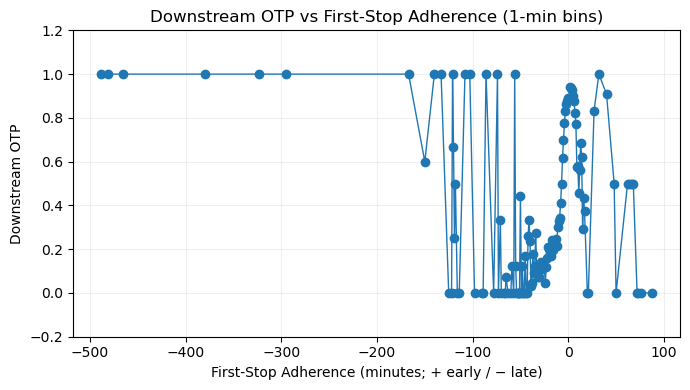

In [21]:
# Q6 — First Stop Impact (using canonical aliases; interpretable outputs)
# - What: Evaluate whether starting early/late (first timepoint adherence) affects downstream OTP.
# - Why: Reveal recovery vs. propagation dynamics that inform schedule padding and control strategies.
# - How: Identify the first timepoint per trip; attach its adherence to all rows; analyze downstream OTP by first_adh bins and a 1-minute smoothed trend.
# - Supports: Q6.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Working view ----
df = DF_OTP.copy()

# Guards / prerequisites
needed = {"trip_key", "TRIP_EDGE", "ROUTE_STOP_SEQUENCE", "SCHEDULED_TIME", "ADHERENCE", "is_ontime"}
missing = [c for c in needed if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for Q6: {missing}")

# Ensure sortable types
df = df.sort_values(["trip_key","ROUTE_STOP_SEQUENCE","SCHEDULED_TIME"]).copy()
df["ROUTE_STOP_SEQUENCE_num"] = pd.to_numeric(df["ROUTE_STOP_SEQUENCE"], errors="coerce")

# ---- Flag the first timepoint per trip (robust) ----
first_seq = df.groupby("trip_key")["ROUTE_STOP_SEQUENCE_num"].transform("min")
df["is_first_tp"] = df["TRIP_EDGE"].eq(1) | df["ROUTE_STOP_SEQUENCE_num"].eq(first_seq)
df["is_first_tp"] = df["is_first_tp"].fillna(False)

# ---- Extract first-stop adherence & headway pct dev per trip ----
first = (
    df.loc[df["is_first_tp"]]
      .sort_values(["trip_key","SCHEDULED_TIME"])
      .groupby("trip_key", as_index=False)
      .agg(first_adh=("ADHERENCE","first"),
           first_hdwy_pct_dev=("hdwy_pct_dev","first"))
)

# Attach first_adh to all rows, then filter to downstream rows (not the first TP)
tmp = df.merge(first, on="trip_key", how="left", validate="many_to_one")
downstream = tmp.loc[~tmp["is_first_tp"] & tmp["first_adh"].notna()].copy()

if downstream.empty or downstream["first_adh"].nunique() <= 1:
    print("Not enough downstream data or variation in first_adh to analyze.")
else:
    # -----------------------------
    # A) Quantile bins of first_adh → downstream OTP (with sample counts)
    # -----------------------------
    q = pd.qcut(downstream["first_adh"], 5, duplicates="drop")
    binned = (
        downstream.groupby(q, observed=True)
                  .agg(
                      downstream_otp=("is_ontime","mean"),
                      n=("is_ontime","size"),
                      first_adh_center=("first_adh","median"),
                  )
                  .reset_index(drop=True)
                  .sort_values("first_adh_center")
    )
    display(binned)

    # -----------------------------
    # B) Smoothed view: 1-minute bins of first_adh → downstream OTP
    # -----------------------------
    downstream["first_adh_round"] = downstream["first_adh"].round(0)
    cont = (
        downstream.groupby("first_adh_round", observed=True)
                  .agg(downstream_otp=("is_ontime","mean"),
                       n=("is_ontime","size"))
                  .reset_index()
                  .sort_values("first_adh_round")
    )
    display(cont.head(10))

    # Plot trend
    plt.figure(figsize=(7,4))
    plt.plot(cont["first_adh_round"], cont["downstream_otp"], marker="o", linewidth=1)
    plt.title("Downstream OTP vs First-Stop Adherence (1-min bins)")
    plt.xlabel("First-Stop Adherence (minutes; + early / − late)")
    plt.ylabel("Downstream OTP")
    plt.ylim(-0.2, 1.2)
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


### 7) What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer scheduled layover time have more stable headway values?

In [22]:
# Q7 — Layover at Start vs Headway Stability (using canonical aliases)
# - What: Test whether scheduled (and, if available, actual) layover at trip start reduces headway variability.
# - Why: Inform terminal buffer policy and schedule design.
# - How: Compute per-trip headway variability (std of hdwy_pct_dev); scatter vs SCHEDULED_LAYOVER_MINUTES with correlation and a binned summary.
# - Supports: Q7.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = DF_OTP.copy()

req_cols = {"trip_key", "TRIP_EDGE", "SCHEDULED_LAYOVER_MINUTES", "hdwy_pct_dev"}
missing = [c for c in req_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for Q7: {missing}")

# (A) Per-trip headway stability (std of headway % deviation)
hdwy_std = (
    df.groupby("trip_key", observed=True)["hdwy_pct_dev"]
      .std()                               # NaNs are ignored; std requires >=2 non-NaNs
      .rename("hdwy_std")
)

# (B) Scheduled layover at trip start (TRIP_EDGE == 1). Some trips may appear more than once; dedupe.
start_rows = (
    df.loc[df["TRIP_EDGE"].eq(1), ["trip_key", "SCHEDULED_LAYOVER_MINUTES"]]
      .drop_duplicates("trip_key")
)

# (C) Assemble analysis frame and drop rows without both measures
lay = (
    start_rows.merge(hdwy_std, on="trip_key", how="left")
              .dropna(subset=["SCHEDULED_LAYOVER_MINUTES", "hdwy_std"])
              .copy()
)

if lay.empty:
    print("No layover/headway stability data available.")
else:
    # ---- Correlation ----
    corr = lay[["SCHEDULED_LAYOVER_MINUTES","hdwy_std"]].corr().iloc[0,1]
    print(f"Correlation (Scheduled layover minutes, Headway std): {corr:.3f}  (n={len(lay):,})")

    # ---- Scatter with simple linear fit ----
    x = lay["SCHEDULED_LAYOVER_MINUTES"].astype(float).values
    y = lay["hdwy_std"].astype(float).values

    plt.figure(figsize=(6.5,5))
    plt.scatter(x, y, s=10, alpha=0.35)
    if len(lay) >= 2 and np.isfinite(x).all() and np.isfinite(y).all():
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(np.nanmin(x), np.nanmax(x), 100)
        plt.plot(xs, m*xs + b, linewidth=1)
    plt.title("Layover at Start vs Headway Stability (per trip)")
    plt.xlabel("Scheduled Layover (minutes)")
    plt.ylabel("Headway % Deviation — Std per Trip")
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # ---- Binned summary (quantile bins of layover) ----
    lay["lay_bin"] = pd.qcut(lay["SCHEDULED_LAYOVER_MINUTES"], 5, duplicates="drop")
    lay_binned = (
        lay.groupby("lay_bin", observed=True)
           .agg(
               n=("hdwy_std","size"),
               hdwy_std_mean=("hdwy_std","mean"),
               hdwy_std_median=("hdwy_std","median"),
               layover_center=("SCHEDULED_LAYOVER_MINUTES","median")
           )
           .reset_index()
           .sort_values("layover_center")
    )
    display(lay_binned)

    # ---- (Optional) Actual dwell at first stop vs stability, if available ----
    if "DWELL_IN_MINS" in df.columns:
        dwell_start = (
            df.loc[df["TRIP_EDGE"].eq(1), ["trip_key","DWELL_IN_MINS"]]
              .drop_duplicates("trip_key")
              .rename(columns={"DWELL_IN_MINS":"dwell_start_min"})
        )
        lay2 = dwell_start.merge(hdwy_std, on="trip_key", how="left").dropna()
        if not lay2.empty:
            pcorr = lay2["dwell_start_min"].corr(lay2["hdwy_std"])
            print(f"(Optional) Correlation (Actual dwell at start, Headway std): {pcorr:.3f}  (n={len(lay2):,})")

            plt.figure(figsize=(6.5,5))
            plt.scatter(lay2["dwell_start_min"], lay2["hdwy_std"], s=10, alpha=0.35)
            if len(lay2) >= 2:
                m2, b2 = np.polyfit(lay2["dwell_start_min"], lay2["hdwy_std"], 1)
                xs2 = np.linspace(lay2["dwell_start_min"].min(), lay2["dwell_start_min"].max(), 100)
                plt.plot(xs2, m2*xs2 + b2, linewidth=1)
            plt.title("Actual Dwell at Start vs Headway Stability (per trip)")
            plt.xlabel("Actual Dwell at Start (minutes)")
            plt.ylabel("Headway % Deviation — Std per Trip")
            plt.grid(alpha=0.2)
            plt.tight_layout()
            plt.show()


No layover/headway stability data available.


### 8) What is the relationship between distance or time traveled since the start of a given trip and the adherence value? Does on-time performance become less stable the further along the route the bus has traveled?

,count,mean,std
duration_bin,,,
0–10,36923,-2.715060,4.503508
10–20,81870,-3.124784,5.943936
20–30,67442,-2.858922,5.607608
30–45,63610,-3.483581,6.865856
45–60,19685,-5.336766,8.580876


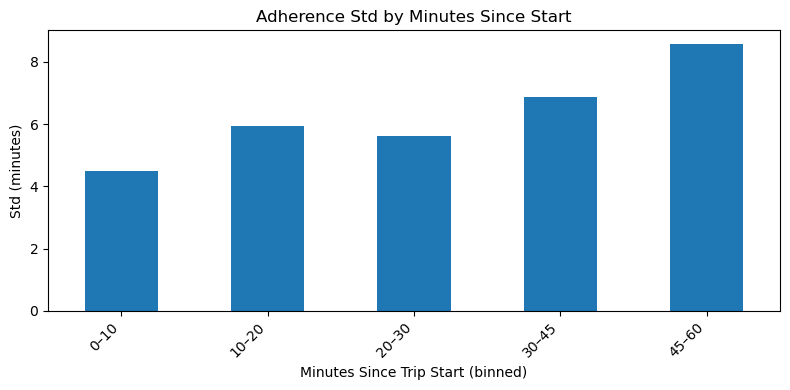

In [23]:
# Q8 — Stability vs Minutes Since Start (fixed and using canonical aliases)
# - What: Test whether adherence variability grows as trips progress.
# - Why: Identify mid/late-route reliability issues and where supervision may help.
# - How: Compute minutes since first scheduled TP per trip; bin and aggregate adherence count/mean/std; chart std by bin.
# - Supports: Q8.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = DF_OTP.sort_values(["trip_key","ROUTE_STOP_SEQUENCE","SCHEDULED_TIME"]).copy()

# Guard required columns
need = {"trip_key","SCHEDULED_TIME","ROUTE_STOP_SEQUENCE","ADHERENCE"}
miss = [c for c in need if c not in df.columns]
if miss:
    raise ValueError(f"Missing required columns for Q8: {miss}")

# Minutes since each trip's first scheduled timepoint
t0 = df.groupby("trip_key", observed=True)["SCHEDULED_TIME"].transform("min")
df["mins_since_start"] = (df["SCHEDULED_TIME"] - t0).dt.total_seconds() / 60.0

# Bin edges and readable labels
edges = [0, 10, 20, 30, 45, 60, 90, 120, np.inf]
labels = ["0–10","10–20","20–30","30–45","45–60","60–90","90–120","120+"]

bins = pd.cut(df["mins_since_start"], edges, labels=labels, right=True)

# Aggregate adherence stats per distance-from-start bin
agg = (
    df.groupby(bins, observed=True)["ADHERENCE"]
      .agg(count="size", mean="mean", std="std")
      .reset_index()
      .rename(columns={"mins_since_start": "duration_bin"})
)

# Filter out small-sample bins
agg_filt = agg.loc[agg["count"] >= 300].set_index("duration_bin")
display(agg_filt)

# Plot adherence variability by elapsed trip duration
plt.figure(figsize=(8,4))
agg_filt["std"].plot(kind="bar")
plt.title("Adherence Std by Minutes Since Start")
plt.ylabel("Std (minutes)")
plt.xlabel("Minutes Since Trip Start (binned)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 9) Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal). How do the variables studied related to headway deviation?

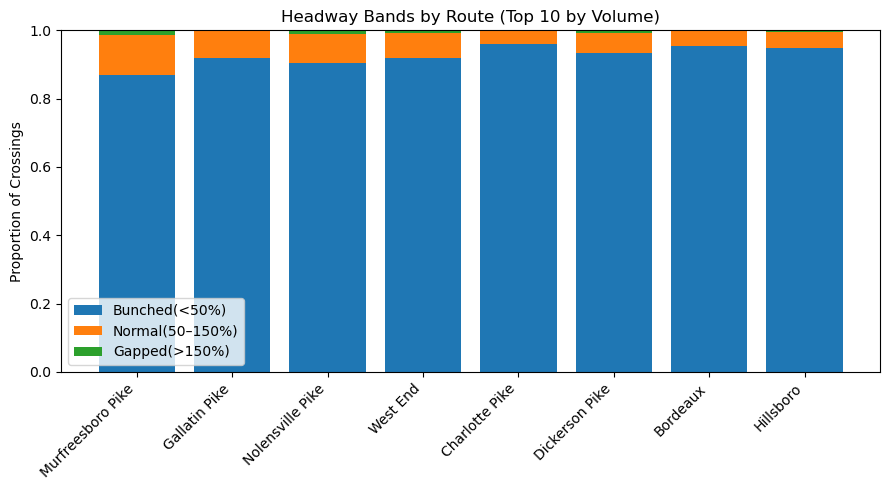

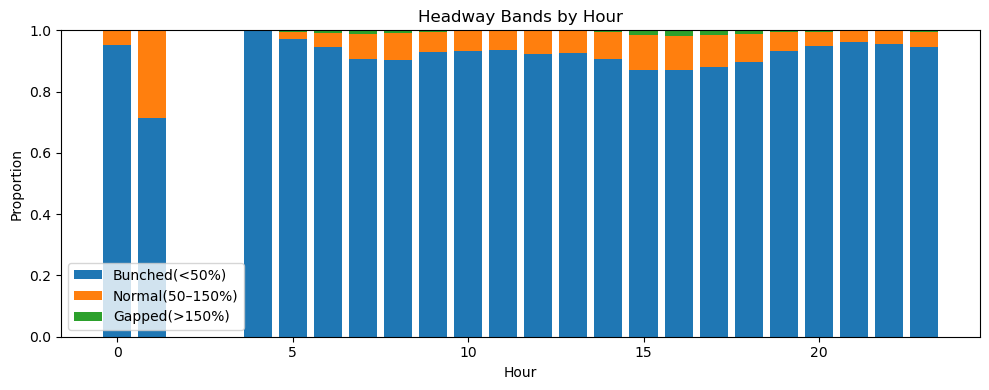

C:\Users\micha\AppData\Local\Temp\ipykernel_2720\1990330383.py:112: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dow_tot = dow_band.groupby("dow")["n"].sum().rename("dow_total")


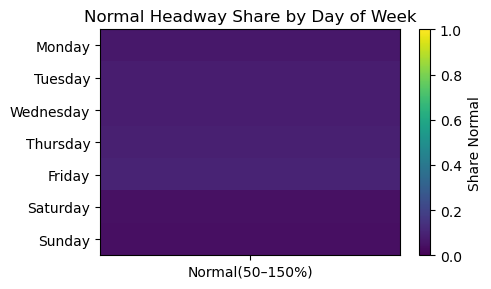

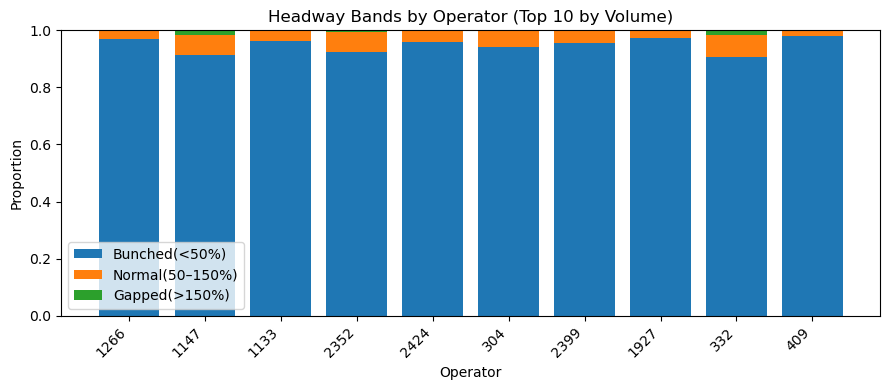

In [24]:
# Q9 — Headway Deviation Bands & Related Variables (using canonical aliases)
# - What: Explore where/when/who has bunching (<50%), normal (50–150%), gapping (>150%).
# - Why: Target interventions (schedule, ops) at specific routes/times/operators.
# - How: Create hdwy_band and show: (A) route-level stacked bars (top routes by volume),
#         (B) hour distribution, (C) day-of-week heatmap, (D) operator distribution (top 10 by volume).
# - Supports: Q9; context for Q2–Q5.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------- Prep --------
df = DF_OTP.copy()

# Guard the columns we need
need = {"hdwy_pct_dev","ROUTE_ABBR","route_name","hour","dow","OPERATOR"}
miss = [c for c in need if c not in df.columns]
if miss:
    raise ValueError(f"Missing required columns for Q9: {miss}")

# Ensure readable names / keys
df["route_name"] = df["route_name"].fillna(df["ROUTE_ABBR"].astype(str))
df["OPERATOR_str"] = df["OPERATOR"].astype(str)

# Headway band by percent deviation (actual/scheduled)
df["hdwy_band"] = pd.cut(
    df["hdwy_pct_dev"],
    [-np.inf, 0.5, 1.5, np.inf],
    labels=["Bunched(<50%)", "Normal(50–150%)", "Gapped(>150%)"]
)

bands = ["Bunched(<50%)","Normal(50–150%)","Gapped(>150%)"]

# =========================
# A) Route-level stacked bars (Top 10 by volume)
# =========================
route_vol = (
    df.groupby("route_name", observed=True)
      .size().rename("n").reset_index()
      .sort_values("n", ascending=False)
)
top_routes = route_vol.head(10)["route_name"].tolist()

sub_routes = df[df["route_name"].isin(top_routes)].copy()
route_band = (
    sub_routes.groupby(["route_name","hdwy_band"], observed=True)
              .size().rename("n").reset_index()
)
route_tot = route_band.groupby("route_name")["n"].sum().rename("route_total")
route_band = route_band.merge(route_tot, on="route_name", how="left")
route_band["pct"] = route_band["n"] / route_band["route_total"]

routes_order = route_vol.loc[route_vol["route_name"].isin(top_routes), "route_name"].tolist()
stack = (
    route_band.pivot(index="route_name", columns="hdwy_band", values="pct")
              .reindex(routes_order)
              .fillna(0)
)

plt.figure(figsize=(9,5))
bottom = np.zeros(len(stack))
for b in bands:
    vals = stack[b].values if b in stack.columns else np.zeros(len(stack))
    plt.bar(stack.index, vals, bottom=bottom, label=b)
    bottom += vals
plt.xticks(rotation=45, ha="right")
plt.ylim(0,1)
plt.legend()
plt.title("Headway Bands by Route (Top 10 by Volume)")
plt.ylabel("Proportion of Crossings")
plt.tight_layout()
plt.show()

# =========================
# B) Hour distribution (stacked proportions)
# =========================
hour_band = (
    df.groupby(["hour","hdwy_band"], observed=True)
      .size().rename("n").reset_index()
)
hour_tot = hour_band.groupby("hour")["n"].sum().rename("hour_total")
hour_band = hour_band.merge(hour_tot, on="hour", how="left")
hour_band["pct"] = hour_band["n"] / hour_band["hour_total"]

hours = list(range(24))
hour_piv = (
    hour_band.pivot(index="hour", columns="hdwy_band", values="pct")
             .reindex(hours)
             .fillna(0)
)

plt.figure(figsize=(10,4))
bottom = np.zeros(len(hour_piv))
for b in bands:
    vals = hour_piv[b].values if b in hour_piv.columns else np.zeros(len(hour_piv))
    plt.bar(hours, vals, bottom=bottom, label=b)
    bottom += vals
plt.title("Headway Bands by Hour")
plt.xlabel("Hour")
plt.ylabel("Proportion")
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# C) Day-of-week heatmap (share Normal)
# =========================
dow_band = (
    df.groupby(["dow","hdwy_band"], observed=True)
      .size().rename("n").reset_index()
)
dow_tot = dow_band.groupby("dow")["n"].sum().rename("dow_total")
dow_band = dow_band.merge(dow_tot, on="dow", how="left")
dow_band["pct"] = dow_band["n"] / dow_band["dow_total"]

weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
normal_dow = (
    dow_band.loc[dow_band["hdwy_band"].eq("Normal(50–150%)")]
            .pivot(index="dow", columns="hdwy_band", values="pct")
            .reindex(weekday_order)
)
plt.figure(figsize=(5,3))
plt.imshow(normal_dow, aspect="auto", interpolation="nearest", vmin=0.0, vmax=1.0)
plt.title("Normal Headway Share by Day of Week")
plt.colorbar(label="Share Normal")
plt.yticks(range(len(normal_dow.index)), normal_dow.index)
plt.xticks([0], ["Normal(50–150%)"])
plt.tight_layout()
plt.show()

# =========================
# D) Operator distribution (Top 10 by volume)
# =========================
op_vol = (
    df.groupby("OPERATOR_str", observed=True)
      .size().rename("n").reset_index()
      .sort_values("n", ascending=False)
)
top_ops = op_vol.head(10)["OPERATOR_str"].tolist()

op_sub = df[df["OPERATOR_str"].isin(top_ops)].copy()
op_band = (
    op_sub.groupby(["OPERATOR_str","hdwy_band"], observed=True)
          .size().rename("n").reset_index()
)
op_tot = op_band.groupby("OPERATOR_str")["n"].sum().rename("op_total")
op_band = op_band.merge(op_tot, on="OPERATOR_str", how="left")
op_band["pct"] = op_band["n"] / op_band["op_total"]

ops_order = op_vol.loc[op_vol["OPERATOR_str"].isin(top_ops), "OPERATOR_str"].tolist()
op_piv = (
    op_band.pivot(index="OPERATOR_str", columns="hdwy_band", values="pct")
           .reindex(ops_order)
           .fillna(0)
)

plt.figure(figsize=(9,4))
bottom = np.zeros(len(op_piv))
for b in bands:
    vals = op_piv[b].values if b in op_piv.columns else np.zeros(len(op_piv))
    plt.bar(op_piv.index, vals, bottom=bottom, label=b)
    bottom += vals
plt.title("Headway Bands by Operator (Top 10 by Volume)")
plt.xlabel("Operator")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


### 9.1) Headway reliability by route

,ROUTE_ABBR,route_name,has_overload,reliability,n
4,22,Bordeaux,False,0.028121,23932
5,22,Bordeaux,True,0.035714,28
8,50,Charlotte Pike,False,0.031542,42420
9,50,Charlotte Pike,True,0.087591,137
6,23,Dickerson Pike,False,0.043649,39268
7,23,Dickerson Pike,True,0.060606,66
14,56,Gallatin Pike,False,0.064319,58459
15,56,Gallatin Pike,True,0.210117,257
2,7,Hillsboro,False,0.032072,16962
3,7,Hillsboro,True,0.131579,38


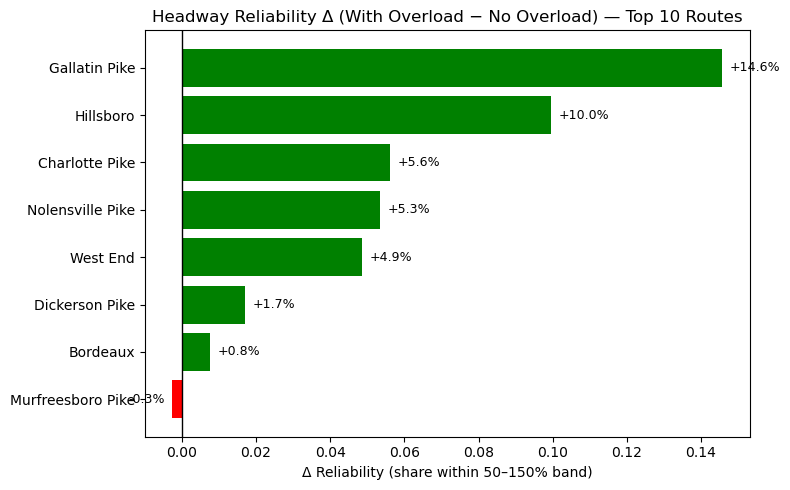

has_overload,no_overload,with_overload,delta
route_name,,,
Murfreesboro Pike,9.5%,9.3%,-0.3%
Bordeaux,2.8%,3.6%,0.8%
Dickerson Pike,4.4%,6.1%,1.7%
West End,5.8%,10.7%,4.9%
Nolensville Pike,6.9%,12.2%,5.3%
Charlotte Pike,3.2%,8.8%,5.6%
Hillsboro,3.2%,13.2%,10.0%
Gallatin Pike,6.4%,21.0%,14.6%


In [25]:
# 9.1 — Headway Reliability by Route (using canonical aliases)
# - What: Compare headway reliability (share of 50–150% headway) with vs. without overloads.
# - Why: See if overload trips (dispatch-added coverage) coincide with better or worse spacing adherence.
# - How: Define ok_hdwy = 50–150% band; group by route & has_overload; compute mean, n, and delta.
# - Supports: Q9; complements operator and route-level reliability insights.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = DF_OTP.copy()

# Guard required columns
need = {"hdwy_pct_dev", "ROUTE_ABBR", "route_name"}
miss = [c for c in need if c not in df.columns]
if miss:
    raise ValueError(f"Missing required columns for Q9.1: {miss}")

# Overload flag normalization
if "OVERLOAD_ID" in df.columns:
    df["OVERLOAD_ID"] = pd.to_numeric(df["OVERLOAD_ID"], errors="coerce").fillna(0).astype(int)
    df["has_overload"] = df["OVERLOAD_ID"].ne(0)
else:
    df["has_overload"] = False

# Fallback for route name
df["route_name"] = df["route_name"].fillna(df["ROUTE_ABBR"].astype(str))

# Define headway reliability band (within 50–150%)
df["ok_hdwy"] = df["hdwy_pct_dev"].between(0.5, 1.5)

# Aggregate reliability by route and overload presence
by_overload = (
    df.groupby(["ROUTE_ABBR", "route_name", "has_overload"], observed=True)
      .agg(reliability=("ok_hdwy", "mean"),
           n=("ok_hdwy", "size"))
      .reset_index()
)

# Display summary table
display(by_overload.sort_values(["route_name", "has_overload", "n"], ascending=[True, True, False]).head(20))

# Identify top 10 routes by total observations
route_counts = (
    df.groupby(["ROUTE_ABBR", "route_name"], observed=True)
      .size().rename("tot").reset_index()
)
top_routes = route_counts.sort_values("tot", ascending=False).head(10)[["ROUTE_ABBR", "route_name"]]

top = by_overload.merge(top_routes, on=["ROUTE_ABBR", "route_name"], how="inner")

# Pivot reliability into with_overload / no_overload columns
piv = (
    top.pivot(index="route_name", columns="has_overload", values="reliability")
       .rename(columns={False: "no_overload", True: "with_overload"})
       .dropna(how="all")
       .fillna(0)
)

# Compute reliability delta
piv["delta"] = piv.get("with_overload", 0) - piv.get("no_overload", 0)
piv = piv.sort_values("delta")  # negative = overload coincides with worse spacing

# Plot: Delta reliability (with vs. without overload)
plt.figure(figsize=(8,5))
plt.barh(piv.index, piv["delta"], color=np.where(piv["delta"] >= 0, "green", "red"))
for i, d in enumerate(piv["delta"]):
    plt.text(d + (0.002 if d >= 0 else -0.002), i, f"{d:+.1%}", va="center",
             ha="left" if d >= 0 else "right", fontsize=9)
plt.axvline(0, color="k", lw=1)
plt.title("Headway Reliability Δ (With Overload − No Overload) — Top 10 Routes")
plt.xlabel("Δ Reliability (share within 50–150% band)")
plt.tight_layout()
plt.show()

# Display formatted comparison table
display(piv[["no_overload", "with_overload", "delta"]].style.format("{:.1%}"))


### 9.2) Clean headway lens

Lower 'stability' = better (smaller median |% deviation|).


,ROUTE_ABBR,route_name,stability,n
2,22,Bordeaux,0.087778,23917
1,7,Hillsboro,0.093333,16932
4,50,Charlotte Pike,0.114167,42288
3,23,Dickerson Pike,0.115359,39211
0,3,West End,0.141667,44833
5,52,Nolensville Pike,0.147560,48810
7,56,Gallatin Pike,0.180000,58324
6,55,Murfreesboro Pike,0.238333,59721


,ROUTE_ABBR,route_name,stability,n
2,22,Bordeaux,0.087778,23917
1,7,Hillsboro,0.093333,16932
4,50,Charlotte Pike,0.114167,42288
3,23,Dickerson Pike,0.115359,39211
0,3,West End,0.141667,44833
5,52,Nolensville Pike,0.147560,48810
7,56,Gallatin Pike,0.180000,58324
6,55,Murfreesboro Pike,0.238333,59721


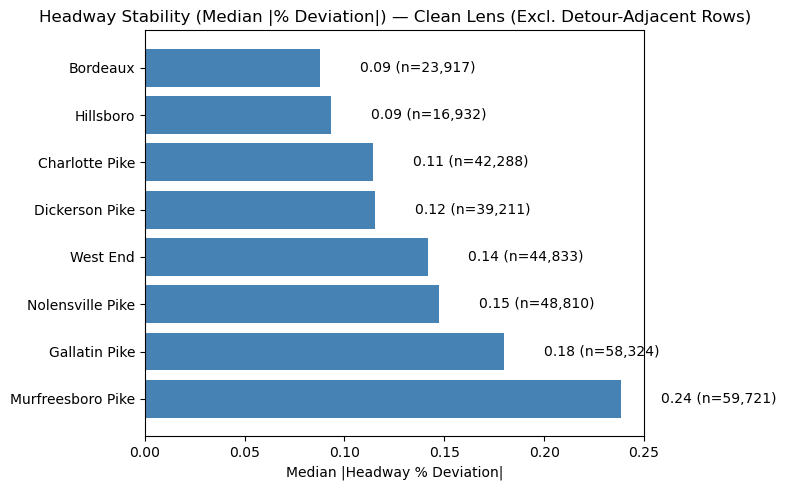

In [26]:
# 9.2 — Clean Headway Lens (using canonical aliases)
# - What: Compute headway stability excluding detour-adjacent rows.
# - Why: Avoid inflated headway deviations caused by detours or cancelled previous stops.
# - How: Filter PREV_SCHED_STOP_CANCELLED != 1; compute per-route median |headway % deviation|.
# - Supports: Q9 (cleaner diagnostics) and Q2 (route-level reliability comparisons).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = DF_OTP.copy()

# Guard: required column presence
need = {"hdwy_pct_dev", "ROUTE_ABBR", "route_name"}
miss = [c for c in need if c not in df.columns]
if miss:
    raise ValueError(f"Missing required columns for Q9.2: {miss}")

# Normalize detour flag (PREV_SCHED_STOP_CANCELLED)
if "PREV_SCHED_STOP_CANCELLED" in df.columns:
    df["PREV_SCHED_STOP_CANCELLED"] = (
        pd.to_numeric(df["PREV_SCHED_STOP_CANCELLED"], errors="coerce")
          .fillna(0).astype(int)
    )
    clean_mask = df["PREV_SCHED_STOP_CANCELLED"].ne(1)
else:
    clean_mask = pd.Series(True, index=df.index)
    print("Column 'PREV_SCHED_STOP_CANCELLED' not found — proceeding with all rows.")

# Filter to 'clean' headway rows
dclean = df.loc[clean_mask].copy()

# Route name fallback for display
dclean["route_name"] = dclean["route_name"].fillna(dclean["ROUTE_ABBR"].astype(str))

# Compute per-route median absolute % deviation (robust to outliers)
route_hdwy_stability = (
    dclean.groupby(["ROUTE_ABBR", "route_name"], observed=True)["hdwy_pct_dev"]
          .agg(stability=lambda s: s.dropna().abs().median(), n="size")
          .reset_index()
          .sort_values(["stability", "n"], ascending=[True, False])
)

print("Lower 'stability' = better (smaller median |% deviation|).")

# Display top and bottom performers
display(route_hdwy_stability.head(15))   # best (most stable)
display(route_hdwy_stability.tail(15))   # worst (least stable)

# Plot: Top 15 most stable routes
top15 = route_hdwy_stability.head(15)
plt.figure(figsize=(8,5))
plt.barh(top15["route_name"][::-1], top15["stability"][::-1], color="steelblue")
for i, (st, n_) in enumerate(zip(top15["stability"][::-1], top15["n"][::-1])):
    plt.text(st + 0.02, i, f"{st:.2f} (n={n_:,})", va="center")
plt.title("Headway Stability (Median |% Deviation|) — Clean Lens (Excl. Detour-Adjacent Rows)")
plt.xlabel("Median |Headway % Deviation|")
plt.tight_layout()
plt.show()


### 9.3) Lightweight multivariate view — What drives OTP?

In [27]:
# 9.3 — Lightweight multivariate view — What drives OTP?  (using canonical aliases)
# - What: Build simple dummy features and rank them by association with OTP.
# - Why: Provide a quick “feature importance” proxy without heavy modeling to guide where to dig deeper.
# - How: Cast categoricals to *_cat strings, collapse rare levels, one-hot encode, compute point-biserial correlations; optional logistic check.
# - Supports: Q1–Q5 context (which routes/directions/times align with higher or lower OTP).

import pandas as pd
import numpy as np

# Source (policy-aligned rows)
df = DF_OTP.copy()

# ---- Target ---------------------------------------------------------------
y = pd.to_numeric(df["is_ontime"], errors="coerce").astype(float)

# ---- Base feature columns -------------------------------------------------
# Guard hour (already engineered in Step 0)
df["hour"] = pd.to_numeric(df.get("hour"), errors="coerce").fillna(-1).astype(int)

# Work on string-casted copies to avoid dtype issues (e.g., Int64 → str)
# Use robust numeric → Int64 → str for ROUTE_ABBR
route_abbr_str = (
    pd.to_numeric(df.get("ROUTE_ABBR"), errors="coerce")
      .astype("Int64")
      .astype(str)
)

cat_src = {
    "ROUTE_ABBR": route_abbr_str,
    "ROUTE_DIRECTION_NAME": df.get("ROUTE_DIRECTION_NAME", pd.Series(index=df.index)).astype(str),
    "service_type": df.get("service_type", pd.Series(index=df.index)).astype(str),
    "peak": df.get("peak", pd.Series(index=df.index)).astype(str),
}

for c, s in cat_src.items():
    df[f"{c}_cat"] = s.where(s.notna(), f"{c}__MISSING")

# ---- Collapse rare categories (min frequency) ----------------------------
min_count = 300  # tweak if desired
for c in ["ROUTE_ABBR_cat","ROUTE_DIRECTION_NAME_cat","service_type_cat","peak_cat"]:
    vc = df[c].value_counts(dropna=False)
    keep = set(vc[vc >= min_count].index)
    df.loc[~df[c].isin(keep), c] = f"{c}__OTHER"

# ---- One-hot encode -------------------------------------------------------
feat_cols = ["ROUTE_ABBR_cat","ROUTE_DIRECTION_NAME_cat","hour","service_type_cat","peak_cat"]
X = pd.get_dummies(df[feat_cols], drop_first=True, dtype=float)
# Align to y (just in case)
X = X.loc[y.index]
# Drop all-NaN columns (defensive)
X = X.loc[:, X.notna().any(axis=0)]

# ---- Fast importance proxy: point-biserial correlation --------------------
def safe_corr(col, y):
    try:
        c = np.corrcoef(col.values, y.values)[0, 1]
        return c if np.isfinite(c) else np.nan
    except Exception:
        return np.nan

feat_corr = X.apply(lambda col: safe_corr(col, y)).dropna()

top_pos = feat_corr.sort_values(ascending=False).head(20)
top_neg = feat_corr.sort_values(ascending=True).head(20)

print("Top positive associations with OTP (higher → more on-time):")
display(top_pos.to_frame("corr").style.format("{:.3f}"))

print("Top negative associations with OTP (lower → less on-time):")
display(top_neg.to_frame("corr").style.format("{:.3f}"))

# ---- Optional: quick logistic check (skip silently if sklearn missing) ---
try:
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_auc_score

    Xn = X.fillna(0)
    yv = y.fillna(0)

    # Stratified split preserves OTP balance
    X_train, X_test, y_train, y_test = train_test_split(
        Xn, yv, test_size=0.25, random_state=42, stratify=(yv > 0.5)
    )

    clf = LogisticRegression(max_iter=300, class_weight="balanced", solver="lbfgs", n_jobs=None)
    clf.fit(X_train, y_train)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"Logistic AUC (holdout): {auc:.3f}")

    coef = pd.Series(clf.coef_.ravel(), index=X.columns).sort_values(key=np.abs, ascending=False)
    print("Top logistic coefficients (by |coef|):")
    display(coef.head(20).to_frame("coef").style.format("{:+.3f}"))

except Exception as e:
    print("Skipped logistic regression (scikit-learn not available or failed).")
    print("Reason:", e)


Top positive associations with OTP (higher → more on-time):


,corr
ROUTE_DIRECTION_NAME_cat_TO DOWNTOWN,0.121
ROUTE_ABBR_cat_23,0.083
ROUTE_ABBR_cat_50,0.055
service_type_cat_Sunday,0.047
ROUTE_ABBR_cat_56,0.027
ROUTE_ABBR_cat_7,-0.011
service_type_cat_Weekday,-0.029
ROUTE_ABBR_cat_52,-0.033
ROUTE_ABBR_cat_3,-0.038
hour,-0.073


Top negative associations with OTP (lower → less on-time):


,corr
ROUTE_ABBR_cat_55,-0.117
peak_cat_Peak,-0.076
hour,-0.073
ROUTE_ABBR_cat_3,-0.038
ROUTE_ABBR_cat_52,-0.033
service_type_cat_Weekday,-0.029
ROUTE_ABBR_cat_7,-0.011
ROUTE_ABBR_cat_56,0.027
service_type_cat_Sunday,0.047
ROUTE_ABBR_cat_50,0.055


Logistic AUC (holdout): 0.675
Top logistic coefficients (by |coef|):


,coef
ROUTE_ABBR_cat_55,-1.342
ROUTE_ABBR_cat_3,-0.991
ROUTE_ABBR_cat_52,-0.934
ROUTE_ABBR_cat_7,-0.864
ROUTE_DIRECTION_NAME_cat_TO DOWNTOWN,+0.644
ROUTE_ABBR_cat_56,-0.557
service_type_cat_Sunday,+0.487
peak_cat_Peak,-0.402
ROUTE_ABBR_cat_50,-0.391
hour,-0.042


## 🗺 Map Visualizations

In [28]:
# ==== MAP HELPERS (using canonical aliases) ===============================
# These helpers expect the canonical dataframe DF_OTP to exist in memory.
# They build geographic summaries and provide consistent color logic + mapping utilities.

import folium
from folium import Map, FeatureGroup, CircleMarker, LayerControl
from folium.plugins import MarkerCluster
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 1) Build a canonical timepoint geo lookup from DF_OTP
# ------------------------------------------------------------------
def build_timepoint_geo(df=None):
    """
    Build a canonical timepoint geometry table using the aliased DF_OTP dataframe.

    Parameters
    ----------
    df : DataFrame, optional
        If not provided, defaults to global DF_OTP.

    Returns
    -------
    DataFrame
        One row per TIME_POINT_ABBR with representative lat/lon, timepoint_name, and route_name.
    """
    if df is None:
        df = DF_OTP.copy()

    # Choose canonical names per TIME_POINT_ABBR
    name_map = (
        df.dropna(subset=["timepoint_name"])
          .groupby("TIME_POINT_ABBR", observed=True)["timepoint_name"]
          .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else s.iloc[0])
    )

    # Representative coordinates (median = robust)
    coords = (
        df.dropna(subset=["LATITUDE", "LONGITUDE"])
          .groupby("TIME_POINT_ABBR", observed=True)[["LATITUDE", "LONGITUDE"]]
          .median()
    )

    # Representative route name (most frequent)
    rname = (
        df.groupby("TIME_POINT_ABBR", observed=True)["route_name"]
          .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else s.iloc[0])
    )

    geo = (
        coords.join(name_map.rename("timepoint_name"), how="outer")
              .join(rname.rename("route_name"), how="left")
              .reset_index()
    )

    # Fallbacks
    geo["timepoint_name"] = geo["timepoint_name"].fillna(geo["TIME_POINT_ABBR"])
    geo["route_name"] = geo["route_name"].fillna("Multiple / Mixed")

    return geo


# ------------------------------------------------------------------
# 2) Color scales — standardized across all maps
# ------------------------------------------------------------------
def color_by_rate(p):
    """Return color for OTP rate (green→orange→red)."""
    if pd.isna(p):
        return "#9e9e9e"
    if p >= 0.9:
        return "#2ecc71"   # strong green
    if p >= 0.8:
        return "#f39c12"   # amber/orange
    return "#e74c3c"       # red (poor)

def color_by_dev(h):
    """Return color for headway % deviation — near 1.0 is green."""
    if pd.isna(h):
        return "#9e9e9e"
    d = abs(h - 1.0)
    if d <= 0.2:
        return "#2ecc71"
    if d <= 0.5:
        return "#f39c12"
    return "#e74c3c"

def color_by_signed(x, zero_green=False):
    """Return color for adherence deltas (early/late)."""
    if pd.isna(x):
        return "#9e9e9e"
    if zero_green and abs(x) < 0.01:
        return "#2ecc71"
    return "#e74c3c" if x > 0 else "#3498db"  # red = early, blue = late


# ------------------------------------------------------------------
# 3) Map construction + layer management
# ------------------------------------------------------------------
def base_map(center=[36.1627, -86.7816], zoom=11, tiles="CartoDB positron"):
    """Initialize a Folium basemap centered on Nashville (or custom center)."""
    return Map(location=center, zoom_start=zoom, tiles=tiles)

def add_and_show_layers(m, *layers):
    """Add multiple FeatureGroups and attach a visible layer control."""
    for lyr in layers:
        if lyr is not None:
            lyr.add_to(m)
    LayerControl(collapsed=False).add_to(m)
    return m

def save_map(m, filename="../data/wego_map.html"):
    """Save map to local file and print confirmation."""
    m.save(filename)
    print(f"🗺 Map saved to: {filename}")


In [29]:
# 1) Systemwide Performance Overview — timepoint OTP bubbles (Q1, Q2)  [uses canonical aliases]
# - What: Plot each timepoint as a circle styled by its on-time performance (OTP), with readable tooltips.
# - Why: Give a citywide sense of where service is strong/weak, and surface directional asymmetries.
# - How: Compute OTP per TIME_POINT_ABBR × direction, pick the best-OTP direction for labeling, attach route/timepoint names, and map.
# - Supports: Q1 (overall picture), Q2 (route/direction/location effects).

import numpy as np
import pandas as pd

# ---- Source data (policy-aligned) -------------------------------------------------
df = DF_OTP.copy()

# Defensive casts for keys used below
df["TIME_POINT_ABBR"]      = df["TIME_POINT_ABBR"].astype(str)
df["ROUTE_DIRECTION_NAME"] = df["ROUTE_DIRECTION_NAME"].astype(str)
df["route_name"]           = df["route_name"].fillna(df["ROUTE_ABBR"].astype(str))
df["timepoint_name"]       = df["timepoint_name"].fillna(df["TIME_POINT_ABBR"])

# ---- A) OTP per timepoint × direction (with counts) --------------------------------
tp_dir_otp = (
    df.groupby(["TIME_POINT_ABBR","ROUTE_DIRECTION_NAME"], observed=True)["is_ontime"]
      .agg(otp_rate="mean", n="size")
      .reset_index()
)

# ---- B) Choose a single “label direction” per timepoint -----------------------------
# Strategy: pick the direction with the highest OTP; tie-break on largest n.
tp_dir_otp = tp_dir_otp.sort_values(["TIME_POINT_ABBR","otp_rate","n"], ascending=[True, False, False])
tp_best_dir = (
    tp_dir_otp.drop_duplicates(subset=["TIME_POINT_ABBR"], keep="first")
              .rename(columns={"ROUTE_DIRECTION_NAME":"dir"})
)

# ---- C) Representative labels per timepoint (stable names) -------------------------
def _mode_or_first(s: pd.Series):
    m = s.mode()
    return m.iloc[0] if not m.empty else (s.dropna().iloc[0] if s.notna().any() else np.nan)

tp_labels = (
    df.groupby("TIME_POINT_ABBR", observed=True)
      .agg(route_name=("route_name", _mode_or_first),
           timepoint_name=("timepoint_name", _mode_or_first))
      .reset_index()
)

# ---- D) Geography for timepoints ----------------------------------------------------
# Uses aliased helper (expects DF_OTP by default)
geo = build_timepoint_geo(df)
if not {"route_name","timepoint_name"}.issubset(geo.columns):
    geo = geo.merge(tp_labels, on="TIME_POINT_ABBR", how="left")

# ---- E) Attach direction + OTP and also total support (n per timepoint) ------------
tp_totals = tp_dir_otp.groupby("TIME_POINT_ABBR")["n"].sum().rename("n_total").reset_index()

view = (
    geo.merge(tp_best_dir[["TIME_POINT_ABBR","dir","otp_rate","n"]], on="TIME_POINT_ABBR", how="left")
       .merge(tp_labels, on="TIME_POINT_ABBR", how="left", suffixes=("","_lbl"))
       .merge(tp_totals, on="TIME_POINT_ABBR", how="left")
)

# Prefer label columns if present
for col in ["route_name","timepoint_name"]:
    if f"{col}_lbl" in view.columns:
        view[col] = view[col].fillna(view[f"{col}_lbl"])

# Marker size scaled by total observations (soft scale)
def scale_radius(n, nmin=50, nmax=2000, rmin=4, rmax=12):
    if pd.isna(n): return rmin
    n = float(n)
    n = max(nmin, min(n, nmax))
    # linear scale
    return rmin + (rmax - rmin) * (n - nmin) / (nmax - nmin)

# ---- F) Render folium layer ----------------------------------------------------------
m1 = base_map()
layer_all = folium.FeatureGroup(name="All Timepoints — OTP")

for _, r in view.dropna(subset=["LATITUDE","LONGITUDE"]).iterrows():
    otp     = r.get("otp_rate")
    dir_txt = r.get("dir", "—")
    n_tp    = int(r.get("n_total", 0)) if pd.notna(r.get("n_total")) else 0
    radius  = scale_radius(n_tp)

    tooltip_html = (
        f"route: {r.get('route_name','')}"
        f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
        f"<br>dir: {dir_txt}"
        f"<br>OTP: {otp:.0%}" if pd.notna(otp) else
        f"route: {r.get('route_name','')}"
        f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
        f"<br>dir: {dir_txt}"
        f"<br>OTP: n/a"
    )
    tooltip_html += f"<br>n (all dirs): {n_tp:,}"

    folium.CircleMarker(
        [float(r["LATITUDE"]), float(r["LONGITUDE"])],
        radius=radius,
        fill=True,
        fill_color=color_by_rate(otp),
        fill_opacity=0.85,
        color=None,
        tooltip=tooltip_html
    ).add_to(layer_all)

add_and_show_layers(m1, layer_all)
save_map(m1, "../data/map_1_systemwide_otp.html")
m1


TypeError: agg function failed [how->median,dtype->object]

In [ ]:
# 2) Route-Level OTP Map — layers per top 8 routes (Q2, Q3)  [uses canonical aliases]
# - What: Create a layer-controlled map with one layer per top-volume route; markers colored by OTP.
# - Why: Let viewers toggle routes on/off to compare directional and stop-level reliability.
# - How: For each route, compute OTP per TIME_POINT_ABBR×direction, join to canonical geo, render a layer.
# - Supports: Q2 (route/location effects), Q3 (time patterns when combined with other layers).

import pandas as pd
import numpy as np

df = DF_OTP.copy()
df["route_name"]           = df["route_name"].fillna(df["ROUTE_ABBR"].astype(str))
df["TIME_POINT_ABBR"]      = df["TIME_POINT_ABBR"].astype(str)
df["ROUTE_DIRECTION_NAME"] = df["ROUTE_DIRECTION_NAME"].astype(str)

# Top 8 routes by volume
top_routes = (
    df["route_name"]
      .value_counts()
      .head(8)
      .index
      .tolist()
)

# Canonical geo (coords + readable timepoint name only; avoid route assignment from geo)
geo = build_timepoint_geo(df)[["TIME_POINT_ABBR","LATITUDE","LONGITUDE","timepoint_name"]].drop_duplicates("TIME_POINT_ABBR")

# Precompute OTP & counts by route × timepoint × direction
tp_route_otp = (
    df.groupby(["route_name","TIME_POINT_ABBR","ROUTE_DIRECTION_NAME"], observed=True)["is_ontime"]
      .agg(otp_rate="mean", n="size")
      .reset_index()
)

m2 = base_map()
layers = []

for rn in top_routes:
    lyr = folium.FeatureGroup(name=f"Route: {rn}")
    # slice OTP for this route only, then join coords/names
    sub = tp_route_otp[tp_route_otp["route_name"].eq(rn)].merge(geo, on="TIME_POINT_ABBR", how="left")

    for _, r in sub.dropna(subset=["LATITUDE","LONGITUDE"]).iterrows():
        otp = r.get("otp_rate")
        n   = int(r.get("n", 0)) if pd.notna(r.get("n")) else 0
        tooltip_html = (
            f"route: {rn}"
            f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
            f"<br>dir: {r.get('ROUTE_DIRECTION_NAME','—')}"
            f"<br>OTP: {otp:.0%}" if pd.notna(otp) else
            f"route: {rn}"
            f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
            f"<br>dir: {r.get('ROUTE_DIRECTION_NAME','—')}"
            f"<br>OTP: n/a"
        )
        tooltip_html += f"<br>n: {n:,}"

        folium.CircleMarker(
            [float(r["LATITUDE"]), float(r["LONGITUDE"])],
            radius=6,
            fill=True,
            fill_color=color_by_rate(otp),
            fill_opacity=0.85,
            color=None,
            tooltip=tooltip_html
        ).add_to(lyr)

    layers.append(lyr)

add_and_show_layers(m2, *layers)
save_map(m2, "../data/map_2_route_layers.html")
m2


In [ ]:
# 3) Temporal Hotspot — Peak vs Off-peak layers (Q3)  [uses canonical aliases]
# - What: Map OTP at each timepoint separately for Peak and Off-peak.
# - Why: Reveal where rush-hour reliability degrades vs. off-peak baseline.
# - How: Compute OTP (and sample size) per TIME_POINT_ABBR × peak bucket; join canonical geo; render two layers.
# - Supports: Q3 (time-of-day effects) and context for Q2/Q9.

import pandas as pd
import numpy as np

# Source: policy-aligned subset
df = DF_OTP.copy()
df["TIME_POINT_ABBR"] = df["TIME_POINT_ABBR"].astype(str)
df["peak"]            = df["peak"].astype(str)

# OTP per timepoint × peak bucket (+ counts)
tp_peak = (
    df.groupby(["TIME_POINT_ABBR","peak"], observed=True)["is_ontime"]
      .agg(otp_rate="mean", n="size")
      .reset_index()
)

# Canonical geo for timepoints (coords + readable name)
geo = build_timepoint_geo(df)[["TIME_POINT_ABBR","LATITUDE","LONGITUDE","timepoint_name"]].drop_duplicates("TIME_POINT_ABBR")

# Build map with two toggle layers
m3 = base_map()
for bucket in ["Peak","Off-peak"]:
    lyr = folium.FeatureGroup(name=f"{bucket} OTP")
    sub = geo.merge(tp_peak.query("peak == @bucket"), on="TIME_POINT_ABBR", how="left")

    for _, r in sub.dropna(subset=["LATITUDE","LONGITUDE"]).iterrows():
        otp = r.get("otp_rate")
        n   = int(r.get("n", 0)) if pd.notna(r.get("n")) else 0
        tooltip_html = (
            f"{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
            f"<br>bucket: {bucket}"
            f"<br>OTP: {otp:.0%}" if pd.notna(otp) else
            f"{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
            f"<br>bucket: {bucket}"
            f"<br>OTP: n/a"
        )
        tooltip_html += f"<br>n: {n:,}"

        folium.CircleMarker(
            [float(r["LATITUDE"]), float(r["LONGITUDE"])],
            radius=6,
            fill=True,
            fill_color=color_by_rate(otp),
            fill_opacity=0.85,
            color=None,
            tooltip=tooltip_html
        ).add_to(lyr)

    lyr.add_to(m3)

add_and_show_layers(m3)
save_map(m3, "../data/map_3_temporal_peak_vs_offpeak.html")
m3


In [ ]:
# 4) Operator Relief Location Map — where reliefs occur & OTP there (Q4)  [uses canonical aliases]
# - What: Show locations where operator reliefs happen, sized by relief count and colored by OTP at those reliefs.
# - Why: Identify recurring relief hotspots and whether relief points correlate with weaker/stronger performance.
# - How: Filter IS_RELIEF==1, roll up counts and OTP by TIME_POINT_ABBR, join canonical geo, render a clustered layer.
# - Supports: Q4 (operator impact & relief context), informs ops siting decisions.

import pandas as pd
import numpy as np
import folium
from folium import CircleMarker
from folium.plugins import MarkerCluster

# Source (policy-aligned rows)
df = DF_OTP.copy()

# Normalize relief flag
if "IS_RELIEF" in df.columns:
    df["IS_RELIEF"] = pd.to_numeric(df["IS_RELIEF"], errors="coerce").fillna(0).astype(int)
else:
    df["IS_RELIEF"] = 0

# Keep relief rows only
rel = df.loc[df["IS_RELIEF"].eq(1)].copy()

if rel.empty:
    print("No relief crossings found (IS_RELIEF==1). Skipping map.")
else:
    # Aggregate: count of reliefs and OTP at those reliefs per timepoint
    tp_relief = (
        rel.groupby("TIME_POINT_ABBR", observed=True)
           .agg(relief_n=("IS_RELIEF", "size"),
                relief_otp=("is_ontime", "mean"))
           .reset_index()
    )

    # Canonical geo (coords + readable names)
    geo = build_timepoint_geo(df)  # expects TIME_POINT_ABBR, LATITUDE, LONGITUDE, timepoint_name, route_name
    view = geo.merge(tp_relief, on="TIME_POINT_ABBR", how="inner")

    # Build map
    m4 = base_map()
    layer_relief = MarkerCluster(name="Relief Hotspots")

    # Draw markers
    for _, r in view.dropna(subset=["LATITUDE","LONGITUDE"]).iterrows():
        n_rel = int(r.get("relief_n", 0))
        otp   = r.get("relief_otp", np.nan)

        # Scale radius: base 6, grow with volume (cap growth)
        radius = 6 + min(n_rel / 50.0, 8)

        tooltip_html = (
            f"route: {r.get('route_name','')}"
            f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
            f"<br>Reliefs: {n_rel:,}"
        )
        tooltip_html += f"<br>Relief OTP: {otp:.0%}" if pd.notna(otp) else "<br>Relief OTP: n/a"

        CircleMarker(
            [float(r["LATITUDE"]), float(r["LONGITUDE"])],
            radius=radius,
            fill=True,
            fill_color=color_by_rate(otp),
            fill_opacity=0.9,
            color=None,
            tooltip=tooltip_html
        ).add_to(layer_relief)

    add_and_show_layers(m4, layer_relief)
    save_map(m4, "../data/map_4_relief_locations.html")
    m4


In [ ]:
# 5) Headway Deviation Map — median actual/scheduled per timepoint (Q5, Q9)  [uses canonical aliases]
# - What: Map each timepoint colored by the median headway ratio (actual/scheduled); 1.0 is ideal, <1 bunched, >1 gapped.
# - Why: Reveal where spacing regularly compresses or stretches, guiding targeted reliability fixes.
# - How: Median of `hdwy_pct_dev` per TIME_POINT_ABBR, join canonical geo (names + coords), render circles with informative tooltips.
# - Supports: Q5 (relationship to adherence) and Q9 (headway reliability patterns).

import pandas as pd
import numpy as np

# Source: policy-aligned rows with headway fields
df = DF_OTP.copy()

# Guard: ensure headway metric exists
if "hdwy_pct_dev" not in df.columns:
    raise ValueError("hdwy_pct_dev not found. Make sure Step 0 computed headway features.")

# Per-timepoint median headway ratio (robust to outliers)
hdwy = (
    df.groupby("TIME_POINT_ABBR", observed=True)["hdwy_pct_dev"]
      .median()
      .rename("hdwy_med")
      .reset_index()
)

# Canonical geo (median lat/lon + readable names)
geo = build_timepoint_geo(df).merge(hdwy, on="TIME_POINT_ABBR", how="left")

# Fallback colorizer if not defined
try:
    _ = color_by_dev
except NameError:
    def color_by_dev(h):
        if pd.isna(h): return "#9E9E9E"
        d = abs(h - 1.0)
        if d <= 0.2: return "#2ECC71"  # near target
        if d <= 0.5: return "#F59E0B"  # moderate deviation
        return "#EF4444"               # large deviation

m5 = base_map()
layer_hdwy = FeatureGroup(name="Headway Deviation (median actual/scheduled)")

for _, r in geo.dropna(subset=["LATITUDE","LONGITUDE"]).iterrows():
    ratio = r.get("hdwy_med", np.nan)
    tip = (
        f"route: {r.get('route_name','')}"
        f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
        + (f"<br>Median headway ratio: {ratio:.2f}×" if pd.notna(ratio) else "<br>Headway: n/a")
    )
    CircleMarker(
        [float(r["LATITUDE"]), float(r["LONGITUDE"])],
        radius=6,
        fill=True,
        fill_color=color_by_dev(ratio),
        fill_opacity=0.85,
        color=None,
        tooltip=tip
    ).add_to(layer_hdwy)

add_and_show_layers(m5, layer_hdwy)
save_map(m5, "../data/map_5_headway_deviation.html")
m5


In [ ]:
# 6) Start-of-Trip Impact — first stop adherence & downstream OTP (Q6)  [uses canonical aliases]
# - What: Map where trips *start* (first timepoint) and show how the average first-stop adherence relates to downstream OTP.
# - Why: Identify terminals/timepoints where getting out late/early tends to propagate vs. recover.
# - How: Flag first TP per trip, compute (first_adh, downstream_otp) per trip, then aggregate by TIME_POINT_ABBR and map.
# - Supports: Q6.

import numpy as np
import pandas as pd

# Source: policy-aligned rows
df = DF_OTP.copy()

# Defensive typing for sequencing
df = df.sort_values(["trip_key", "ROUTE_STOP_SEQUENCE", "SCHEDULED_TIME"]).copy()
df["ROUTE_STOP_SEQUENCE_num"] = pd.to_numeric(df["ROUTE_STOP_SEQUENCE"], errors="coerce")

# Robust first-TP flag: explicit TRIP_EDGE==1 OR minimal stop sequence within trip
first_seq = df.groupby("trip_key")["ROUTE_STOP_SEQUENCE_num"].transform("min")
is_first = df["TRIP_EDGE"].eq(1) | df["ROUTE_STOP_SEQUENCE_num"].eq(first_seq)
is_first = is_first.fillna(False)

# Per-trip first-stop adherence + per-trip downstream OTP (mean over non-first rows)
first = (
    df.loc[is_first, ["trip_key", "TIME_POINT_ABBR", "ADHERENCE"]]
      .rename(columns={"ADHERENCE": "first_adh"})
      .drop_duplicates("trip_key")  # just in case multiple equal-min rows exist
)

downstream = df.loc[~is_first, ["trip_key", "is_ontime"]]
down_agg = (
    downstream.groupby("trip_key", observed=True)["is_ontime"]
              .mean()
              .rename("downstream_otp")
              .reset_index()
)

trip_first = first.merge(down_agg, on="trip_key", how="left")

# Aggregate the trip-level effects to the *first* timepoint location
tp_first_effect = (
    trip_first.groupby("TIME_POINT_ABBR", observed=True)
              .agg(first_adh_mean=("first_adh", "mean"),
                   downstream_otp=("downstream_otp", "mean"),
                   n_trips=("trip_key", "size"))
              .reset_index()
)

# Join canonical geo (median lat/lon + readable names)
geo = build_timepoint_geo(df).merge(tp_first_effect, on="TIME_POINT_ABBR", how="inner")

# Fallback colorizer for signed adherence if helper isn't defined
try:
    _ = color_by_signed
except NameError:
    def color_by_signed(x, zero_green=False):
        if pd.isna(x): return "#9E9E9E"
        if zero_green and abs(x) < 0.01: return "#2ECC71"
        return "#E74C3C" if x > 0 else "#3498DB"  # early=red, late=blue

m6 = base_map()
layer_first = FeatureGroup(name="First Stop: mean adherence (color) & trips (size)")

for _, r in geo.dropna(subset=["LATITUDE", "LONGITUDE"]).iterrows():
    adh = r.get("first_adh_mean", np.nan)  # + early / - late (minutes)
    ds  = r.get("downstream_otp", np.nan)
    tip = (
        f"route: {r.get('route_name','')}"
        f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
        f"<br>Mean first-stop adherence: {adh:+.2f} min"
        + (f"<br>Downstream OTP (avg): {ds:.0%}" if pd.notna(ds) else "<br>Downstream OTP (avg): n/a")
        + f"<br>Trips: {int(r.get('n_trips', 0)):,}"
    )

    CircleMarker(
        [float(r["LATITUDE"]), float(r["LONGITUDE"])],
        radius=4 + min(float(r["n_trips"]) / 50.0, 10.0),  # scale by number of trips
        fill=True,
        fill_color=color_by_signed(adh),
        fill_opacity=0.9,
        color=None,
        tooltip=tip
    ).add_to(layer_first)

add_and_show_layers(m6, layer_first)
save_map(m6, "../data/map_6_first_stop_impact.html")
m6


In [ ]:
# 7) Layover vs Headway Stability — visualize at start stops (Q7)  [uses canonical aliases]
# - What: For each *start* timepoint, size markers by typical scheduled layover and color by headway variability.
# - Why: Reveal whether more terminal buffer corresponds to more stable spacing.
# - How: Per-trip headway std → join to each trip’s first TP → aggregate to TIME_POINT_ABBR → map with readable tooltips.
# - Supports: Q7.

import numpy as np
import pandas as pd
from folium import FeatureGroup, CircleMarker

df = DF_OTP.copy()

# A) Per-trip headway variability
trip_hdwy = (
    df.groupby("trip_key", observed=True)["hdwy_pct_dev"]
      .std()
      .rename("hdwy_std")
      .reset_index()
)

# B) Trip start records (TRIP_EDGE == 1) with their start timepoint & scheduled layover
starts = (
    df.loc[df["TRIP_EDGE"].eq(1)]
      .sort_values(["trip_key", "SCHEDULED_TIME"])
      .drop_duplicates("trip_key")
      [["trip_key", "TIME_POINT_ABBR", "SCHEDULED_LAYOVER_MINUTES"]]
)

lay = starts.merge(trip_hdwy, on="trip_key", how="left")

# C) Aggregate to the start TIME_POINT_ABBR level
tp_lay = (
    lay.groupby("TIME_POINT_ABBR", observed=True)
       .agg(
           layover_med  = ("SCHEDULED_LAYOVER_MINUTES", "median"),
           hdwy_std_med = ("hdwy_std", "median"),
           n_trips      = ("trip_key", "size"),
       )
       .reset_index()
)

# D) Join canonical geo (LAT/LON + route_name/timepoint_name)
geo = build_timepoint_geo(df).merge(tp_lay, on="TIME_POINT_ABBR", how="inner")

# E) Color & size functions
try:
    _ = color_by_dev
    def color_for_std(std):
        # color_by_dev expects a ratio near 1.0 to be good; map std to 1 + std
        if pd.isna(std):
            return "#9E9E9E"
        return color_by_dev(1.0 + float(std))
except NameError:
    def color_for_std(std):
        if pd.isna(std): return "#9E9E9E"
        s = float(std)
        if s <= 0.15: return "#2ECC71"  # green (very stable)
        if s <= 0.35: return "#F39C12"  # orange (moderate)
        return "#E74C3C"                # red (unstable)

def size_for_layover(mins):
    v = 0.0 if pd.isna(mins) else float(mins)
    return 4.0 + min(v * 0.5, 10.0)  # base 4, grow 0.5 px per minute, cap +10

# F) Render map
m7 = base_map()
layer_lay = FeatureGroup(name="Start Layover (size) vs Headway Std (color)")

for _, r in geo.dropna(subset=["LATITUDE", "LONGITUDE"]).iterrows():
    lay_med = r.get("layover_med", np.nan)
    std_med = r.get("hdwy_std_med", np.nan)
    trips   = int(r.get("n_trips", 0))

    tooltip_html = (
        f"route: {r.get('route_name','')}"
        f"<br>{r.get('timepoint_name','')} ({r.get('TIME_POINT_ABBR','')})"
        f"<br>Median layover: " + (f"{lay_med:.1f} min" if pd.notna(lay_med) else "n/a") +
        f"<br>Median headway std: " + (f"{std_med:.2f}" if pd.notna(std_med) else "n/a") +
        f"<br>Trips: {trips:,}"
    )

    CircleMarker(
        [float(r["LATITUDE"]), float(r["LONGITUDE"])],
        radius=size_for_layover(lay_med),
        fill=True,
        fill_color=color_for_std(std_med),
        fill_opacity=0.9,
        color=None,
        tooltip=tooltip_html
    ).add_to(layer_lay)

add_and_show_layers(m7, layer_lay)
save_map(m7, "../data/map_7_layover_vs_stability.html")
m7


In [ ]:
# 8) Overload & Cancellation — where exceptions occur (Q8)  [uses canonical aliases]
# - What: Map where overloads and cancelled/waived stops occur.
# - Why: Identify spatial patterns of exceptions to normal operations.
# - How: Count overloads and cancellations per TIME_POINT_ABBR, join to coordinates, visualize with separate layers.
# - Supports: Q8.

import pandas as pd
from folium import FeatureGroup, CircleMarker

df = DF_OTP.copy()

# ---- Normalize exception flags ---------------------------------------------------
df["OVERLOAD_ID"]   = pd.to_numeric(df.get("OVERLOAD_ID", 0), errors="coerce").fillna(0).astype(int)
df["STOP_CANCELLED"] = pd.to_numeric(df.get("STOP_CANCELLED", 0), errors="coerce").fillna(0).astype(int)

# ---- Counts per timepoint --------------------------------------------------------
tp_overload = (
    df.loc[df["OVERLOAD_ID"].ne(0)]
      .groupby("TIME_POINT_ABBR", observed=True)
      .size()
      .rename("overload_n")
      .reset_index()
)

tp_cancel = (
    df.groupby("TIME_POINT_ABBR", observed=True)["STOP_CANCELLED"]
      .sum()
      .rename("cancel_n")
      .reset_index()
)

# ---- Join with geo ---------------------------------------------------------------
geo = build_timepoint_geo(df)
geo = (
    geo.merge(tp_overload, on="TIME_POINT_ABBR", how="left")
       .merge(tp_cancel,   on="TIME_POINT_ABBR", how="left")
       .fillna({"overload_n": 0, "cancel_n": 0})
)

# ---- Map layers ------------------------------------------------------------------
m8 = base_map()
layer_over   = FeatureGroup(name="Overloads (purple)")
layer_cancel = FeatureGroup(name="Cancelled/Waived Stops (navy)")

for _, r in geo.dropna(subset=["LATITUDE", "LONGITUDE"]).iterrows():
    lat, lon = float(r["LATITUDE"]), float(r["LONGITUDE"])
    route    = r.get("route_name", "")
    tp_name  = r.get("timepoint_name", "")
    tpid     = r.get("TIME_POINT_ABBR", "")

    # Overloads
    if r["overload_n"] > 0:
        CircleMarker(
            [lat, lon],
            radius=4 + min(r["overload_n"] / 30.0, 10.0),
            fill=True,
            fill_color="#8E44AD",  # purple
            fill_opacity=0.9,
            color=None,
            tooltip=(
                f"route: {route}<br>{tp_name} ({tpid})<br>"
                f"Overloads: {int(r['overload_n']):,}"
            ),
        ).add_to(layer_over)

    # Cancellations
    if r["cancel_n"] > 0:
        CircleMarker(
            [lat, lon],
            radius=4 + min(r["cancel_n"] / 30.0, 10.0),
            fill=True,
            fill_color="#34495E",  # dark blue-gray
            fill_opacity=0.9,
            color=None,
            tooltip=(
                f"route: {route}<br>{tp_name} ({tpid})<br>"
                f"Cancelled/Waived: {int(r['cancel_n']):,}"
            ),
        ).add_to(layer_cancel)

add_and_show_layers(m8, layer_over, layer_cancel)
save_map(m8, "../data/map_8_overloads_cancellations.html")
m8


In [ ]:
# 9) Composite Reliability Dashboard — combine OTP + headway + adherence (Q9)  [uses canonical aliases]
# - What: Build a single “reliability index” per timepoint, blending OTP, headway deviation, and adherence magnitude.
# - Why: Provide a quick, map-friendly score to compare hotspots at a glance.
# - How: Compute per-timepoint metrics from DF_OTP; normalize components; weighted sum into rel_index; map with tooltips.
# - Supports: Q9 (and context for Q1–Q3, Q5).

import numpy as np
import pandas as pd
from folium import FeatureGroup, CircleMarker

df = DF_OTP.copy()

# ---- Per-timepoint metrics (policy-aligned rows) -----------------------------------
tp_otp = (
    df.groupby("TIME_POINT_ABBR", observed=True)["is_ontime"]
      .mean()
      .rename("otp")
      .reset_index()
)

tp_hdwy = (
    df.groupby("TIME_POINT_ABBR", observed=True)["hdwy_pct_dev"]
      .median()
      .rename("hdwy_med")
      .reset_index()
)

tp_adh = (
    df.groupby("TIME_POINT_ABBR", observed=True)["ADHERENCE"]
      .apply(lambda s: s.dropna().abs().mean())
      .rename("adh_abs_mean")
      .reset_index()
)

# ---- Geo & labels ------------------------------------------------------------------
geo = build_timepoint_geo(df)  # expects TIME_POINT_ABBR, LATITUDE, LONGITUDE, timepoint_name, route_name

view = (
    geo.merge(tp_otp, on="TIME_POINT_ABBR", how="left")
       .merge(tp_hdwy, on="TIME_POINT_ABBR", how="left")
       .merge(tp_adh,  on="TIME_POINT_ABBR", how="left")
)

# ---- Composite Reliability Index ---------------------------------------------------
# Components:
# - OTP component:    otp in [0..1]
# - Headway component: 1 - min(|hdwy_med - 1|, 1)
# - Adherence component: 1 - min(|adh_abs_mean|/15, 1)  (15 min scale cap)
headway_comp   = 1 - (view["hdwy_med"].sub(1).abs().clip(0, 1))
adherence_comp = 1 - (view["adh_abs_mean"].fillna(0).abs().div(15).clip(0, 1))

# Weights (tune as needed)
w_otp, w_hdwy, w_adh = 0.5, 0.3, 0.2
view["rel_index"] = (
    w_otp  * view["otp"].fillna(0) +
    w_hdwy * headway_comp.fillna(0) +
    w_adh  * adherence_comp.fillna(0)
)

# ---- Map layer ---------------------------------------------------------------------
m9 = base_map()
layer_rel = FeatureGroup(name="Composite Reliability Index")

for _, r in view.dropna(subset=["LATITUDE","LONGITUDE"]).iterrows():
    lat, lon = float(r["LATITUDE"]), float(r["LONGITUDE"])
    rn = r.get("route_name", "")
    tp = r.get("timepoint_name", "")
    ab = r.get("TIME_POINT_ABBR", "")
    otp = r.get("otp", np.nan)
    hdw = r.get("hdwy_med", np.nan)
    adh = r.get("adh_abs_mean", np.nan)
    rel = r.get("rel_index", np.nan)

    # Tooltip text with graceful fallbacks
    otp_txt = "n/a" if pd.isna(otp) else f"{otp:.0%}"
    hdw_txt = "n/a" if pd.isna(hdw) else f"{hdw:.2f}×"
    adh_txt = "n/a" if pd.isna(adh) else f"{adh:.1f}m"
    rel_txt = "n/a" if pd.isna(rel) else f"{rel:.2f}"

    CircleMarker(
        [lat, lon],
        radius=6,
        fill=True,
        fill_color=color_by_rate(rel),
        fill_opacity=0.9,
        color=None,
        tooltip=(
            f"route: {rn}<br>{tp} ({ab})<br>"
            f"Reliability idx: {rel_txt}<br>"
            f"OTP: {otp_txt} • Headway×: {hdw_txt} • |Adh| mean: {adh_txt}"
        ),
    ).add_to(layer_rel)

add_and_show_layers(m9, layer_rel)
save_map(m9, "../data/map_9_reliability_index.html")
m9
